<a href="https://colab.research.google.com/github/innewiadro/Codewars/blob/master/12_08_FurnitureVision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

GIthub opis

"FurnitureVision is a CNN-based deep learning project that aims to recognize and classify different types of furniture from images, enabling automated furniture identification and categorization."

#Project

The aim of this project is to create a simple convolutional network to recognize and classify type of furniture.

The project recognises furniture using machine learning. The aim of this project is to create a model that can predict which specific piece of furniture is on it from photos of the furniture.

The project has developed code that downloads images from the BlackRedWhite website. It is based on advanced machine learning algorithms such as convolutional neural networks (CNN). In the course of this project, models with different parameters will be presented: network architecture, layer size, to achieve the best possible result.

CNN (Convolutional Neural Network) is a type of deep neural network mainly used for image processing and analysis. CNNs are designed to efficiently detect and recognise patterns in visual data.
The structure of a CNN is based on convolutional layers that detect local image features by applying convolution filters. These filters are traversed over the image and the result of the convolution creates a so-called feature map, which shows where certain patterns or features occur.

In the case of the project, the use of CNNs is appropriate because these networks are very effective in recognising objects from images. By teaching the CNN model on a training set, the model will be able to learn to extract features from different types of furniture and recognise them accurately from new images.

#Imports


Importing the necessary libraries in this project.

In [ ]:
import requests
import os
import random
from time import sleep
import pathlib

import numpy as np
import pandas as pd
import seaborn as sn
from bs4 import BeautifulSoup

from matplotlib import pyplot as plt
from matplotlib.image import imread


from io import BytesIO
from PIL import Image

from google.colab import drive
drive.mount('/content/drive')

from sklearn.metrics import confusion_matrix
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.applications import EfficientNetB0

Mounted at /content/drive


#Web scraper

Web scraper that allows us to get pictures of various furniture from https://www.brw.pl.

In [ ]:
# NIE WŁĄCZAĆ NIE KLIKAĆ

In [ ]:
def get_page(category,subcategory,page_number):
  url = f'https://www.brw.pl/meble/{category}{subcategory}?page={page_number}'
  try:
    response = requests.get(url)
    content = response.content
    sleep(1)
    return content
  except:
    print('Fail')


def parse_images_url(content):

  soup = BeautifulSoup(content, 'html.parser')
  imgs = soup.find_all('img', {'class': 'first-image'})
  return [img['src'] for img in imgs]


def get_image(url, path, subcategory):
  try:
    response = requests.get(url)

    content = response.content

    img = Image.open(BytesIO(content))

    file_name = url.split('/')[-1].split('.')[0] +'.jpg'
    os.makedirs(f'{path}/{subcategory}', exist_ok=True)
    img.save(f'{path}/{subcategory}/{file_name}')
  except:
    print('Fail')


def get_data(category, subcategory, start_page, end_page, path):

  for page_number in range(start_page, end_page + 1):
    content = get_page(category, subcategory, page_number)
    urls = parse_images_url(content)

    for i, url in enumerate(urls):
      get_image(url, path, subcategory)
      sleep(1./100)
      if i % 50 == 0:
        print(f'Downloaded {i} images from page {page_number} from {subcategory}')

Create folder on google drive for pictures

In [ ]:
# NIE WŁĄCZAĆ NIE KLIKAĆ

In [ ]:
path = 'drive/MyDrive/project_computer_vision/data/'

os.makedirs(path + 'train', exist_ok=True)

In [ ]:
# NIE WŁĄCZAĆ NIE KLIKAĆ

Gathering data for our project

In [ ]:
data_path = 'drive/MyDrive/project_computer_vision/data/train'
get_data('przechowywanie/','komody/', 1,6, data_path)
get_data('przechowywanie/','szafki/', 1,5, data_path)
get_data('stoly-i-krzesla/','stoly/', 1,5, data_path)
get_data('meble-wypoczynkowe/','fotele/', 1,2, data_path)
get_data('meble-wypoczynkowe/','sofy/', 1,3, data_path)
get_data('meble-wypoczynkowe/','narozniki/', 1,4, data_path)
get_data('stoly-i-krzesla/','krzesla/', 1,13, data_path)

#Separation of the test set from the data set

##Separation of data sets

In [ ]:
# NIE WŁĄCZAĆ NIE KLIKAĆ

In [ ]:
path = 'drive/MyDrive/project_computer_vision/data/'

os.makedirs(path + 'test', exist_ok=True)

In [ ]:
# NIE WŁĄCZAĆ NIE KLIKAĆ

Separating the training set from the test set is a crucial step in the process of machine learning and statistical modeling. The main purpose of this division is to assess the model's ability to generalize to new, unseen data beyond the given training dataset.

Below are some key reasons why the training set is separated from the test set:

- **Generalization evaluation**: Machine learning models are designed to generalize patterns from the training data. Separating the training set from the test set allows us to evaluate how well the model performs on new data that it hasn't seen before. This helps identify potential issues with overfitting or underfitting the model to the data.

- **Preventing data leakage**: Using the same dataset for both training and testing can lead to a situation known as data leakage. It means the model may perform well on the test data only because it has already seen it in the training data. This does not reflect the true potential of the model's generalization.

- **Hyperparameter optimization**: Splitting the dataset allows us to tune the model's hyperparameters on the training set and evaluate them on the test set. This helps avoid overfitting as the model won't be tailored to specific instances in the test set but rather to general patterns.

- **Aiding in debugging**: By separating the test set, we can gain a better understanding of the sources of errors and issues with the model. We can identify which types of data are challenging for the model to classify or which features introduce noise into the predictions.


The most common approach involves dividing the dataset into three subsets: training, validation, and test sets. The training set is used to train the model, the validation set is used for hyperparameter tuning, and the test set is used for the final assessment of the model's generalization. It is essential not to use the test set for hyperparameter tuning or model fitting. With an appropriate data split, more reliable results can be achieved, and problems related to overfitting can be avoided.

In [ ]:
#02-08 ja bym po polsku wywalil

PO POLSKU
Oddzielanie zbioru treningowego od testowego jest kluczowym krokiem w procesie uczenia maszynowego i modelowania statystycznego. Głównym celem tego podziału jest zbadanie zdolności generalizacji modelu na nowych, nieznanych danych poza danym zbiorem treningowym.

Poniżej wymieniam kilka kluczowych powodów, dlaczego oddziela się zbiór treningowy od testowego:

Ocena zdolności do generalizacji: Modely uczące maszynowe mają za zadanie generalizować wzorce na podstawie danych uczących. Oddzielenie zbioru treningowego od testowego pozwala ocenić, jak dobrze model radzi sobie z nowymi danymi, które wcześniej nie były mu prezentowane. Dzięki temu można zidentyfikować potencjalne problemy z nadmiernym dopasowaniem (overfitting) lub niedostatecznym dopasowaniem (underfitting) modelu do danych.

Zapobieganie oszustwom (data leakage): Jeśli użyjesz tego samego zbioru danych zarówno do trenowania, jak i testowania modelu, może to prowadzić do przypadku znanego jako data leakage. Oznacza to, że model będzie działał dobrze na danych testowych, ale tylko dlatego, że już znał je z danych treningowych. To nie odzwierciedla rzeczywistego potencjału modelu do generalizacji.

Optymalizacja parametrów: Podział zbioru danych pozwala dostosować hiperparametry modelu na zbiorze treningowym i ocenić je na zbiorze testowym. Dzięki temu można uniknąć przeuczenia, ponieważ model nie będzie dostosowany do specyficznych przypadków w zbiorze testowym, a jedynie do ogólnych wzorców.

Pomoc w debugowaniu: Dzięki oddzieleniu zbioru testowego można dokładniej zrozumieć źródło błędów i problemów modelu. Można zidentyfikować, które rodzaje danych są trudne do sklasyfikowania, czy które cechy wprowadzają szum do predykcji.

Najczęstsze podejście to podział zbioru danych na trzy podzbiory: treningowy, walidacyjny i testowy. Zbiór treningowy służy do nauki modelu, zbiór walidacyjny do strojenia hiperparametrów, a zbiór testowy do oceny ostatecznej zdolności generalizacji. Ważne jest, aby nie używać zbioru testowego do regulacji hiperparametrów ani do dostosowywania modelu. Dzięki odpowiedniemu podziałowi zbioru danych można uzyskać bardziej wiarygodne wyniki i uniknąć problemów związanych z przetrenowaniem.

In [ ]:
# nie włączać
test_size = 0.2

for subcategory in ['komody', 'szafki', 'stoly', 'fotele','sofy', 'narozniki', 'krzesla']:
  os.makedirs(path +'test'+ '/'+ subcategory, exist_ok=True)
  file_list = os.listdir(data_path + '/' + subcategory)
  number_of_samples = int(len(file_list) * test_size)

  for file_name in random.sample(file_list, number_of_samples):
    os.rename(data_path + '/' + subcategory + '/' + file_name,
              path + 'test/' + subcategory + '/' + file_name)

The number of images each subcategory in the training and test sets.

In [ ]:
[len(os.listdir(data_path+f'/{i}')) for i in ['fotele', 'komody','krzesla', 'narozniki', 'sofy', 'stoly', 'szafki']]

[95, 136, 172, 78, 84, 80, 480]

In [ ]:
[len(os.listdir(path+f'/test/{i}')) for i in ['fotele', 'komody','krzesla', 'narozniki', 'sofy', 'stoly', 'szafki']]

[23, 34, 42, 19, 20, 20, 120]

##Distribution of different classes in datasets

Visualisation by means of a bar chart of the amount of data per class in the training set.

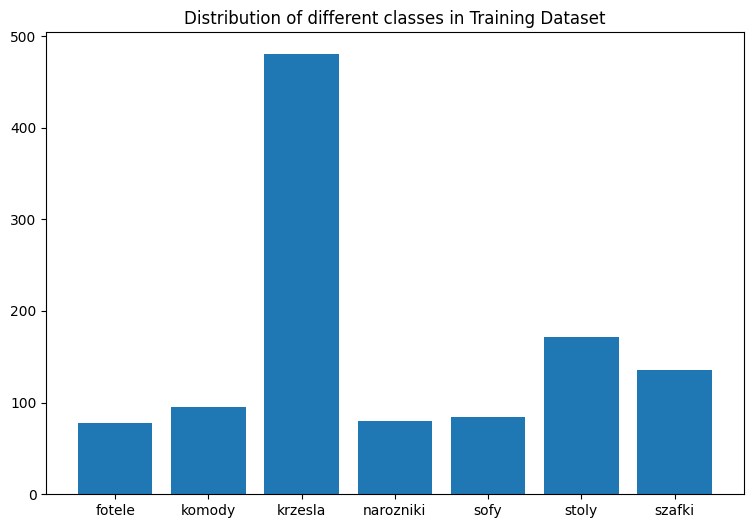

In [ ]:
image_folder = ['fotele', 'komody','krzesla', 'narozniki', 'sofy', 'stoly', 'szafki']
nimgs = {}
for i in image_folder:
    nimages = len(os.listdir('drive/MyDrive/project_computer_vision/data/train/' + i + '/'))
    nimgs[i] = nimages
plt.figure(figsize=(9, 6))
plt.bar(range(len(nimgs)), list(nimgs.values()), align='center')
plt.xticks(range(len(nimgs)), list(nimgs.keys()))
plt.title('Distribution of different classes in Training Dataset')
plt.show()

Visualisation by means of a bar chart of the amount of data per class in the test set.

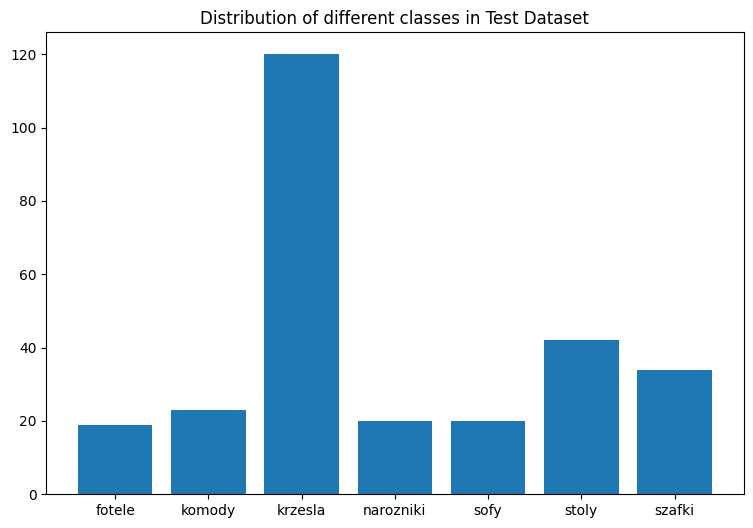

In [ ]:
nimgs = {}
for i in image_folder:
    nimages = len(os.listdir('drive/MyDrive/project_computer_vision/data/test/' + i + '/'))
    nimgs[i] = nimages
plt.figure(figsize=(9, 6))
plt.bar(range(len(nimgs)), list(nimgs.values()), align='center')
plt.xticks(range(len(nimgs)), list(nimgs.keys()))
plt.title('Distribution of different classes in Test Dataset')
plt.show()

We divide the data in such a way that each class is represented in each of the sets, i.e. training, validation and test sets.

The graphs show the breakdown of the sets, where 80% is the training set and 20% is the test set.

## Loading training, validation and test sets

Trening set

In [ ]:
path_train = 'drive/MyDrive/project_computer_vision/data/train'

batch_size = 32
img_height = 128
img_width = 128

In [ ]:
train_ds = keras.utils.image_dataset_from_directory(path_train,
                                                    validation_split = 0.2,
                                                    subset = 'training',
                                                    image_size = (img_height, img_width),
                                                    batch_size = batch_size,
                                                    label_mode = 'categorical',
                                                    seed = 5)

Found 1125 files belonging to 7 classes.
Using 900 files for training.


Validation set

In [ ]:
val_ds = keras.utils.image_dataset_from_directory(path_train,
                                                  validation_split = 0.2,
                                                  subset = 'validation',
                                                  image_size = (img_height, img_width),
                                                  batch_size = batch_size,
                                                  label_mode = 'categorical',
                                                  seed = 5)

Found 1125 files belonging to 7 classes.
Using 225 files for validation.


Test set

In [ ]:
path_test = 'drive/MyDrive/project_computer_vision/data/test'

test_ds = keras.utils.image_dataset_from_directory(path_test,
                                                  image_size = (img_height, img_width),
                                                  batch_size = batch_size,
                                                  label_mode = 'categorical',
                                                  seed = 5)

Found 278 files belonging to 7 classes.


##Data visualisation

Showing data and the label assigned to it.

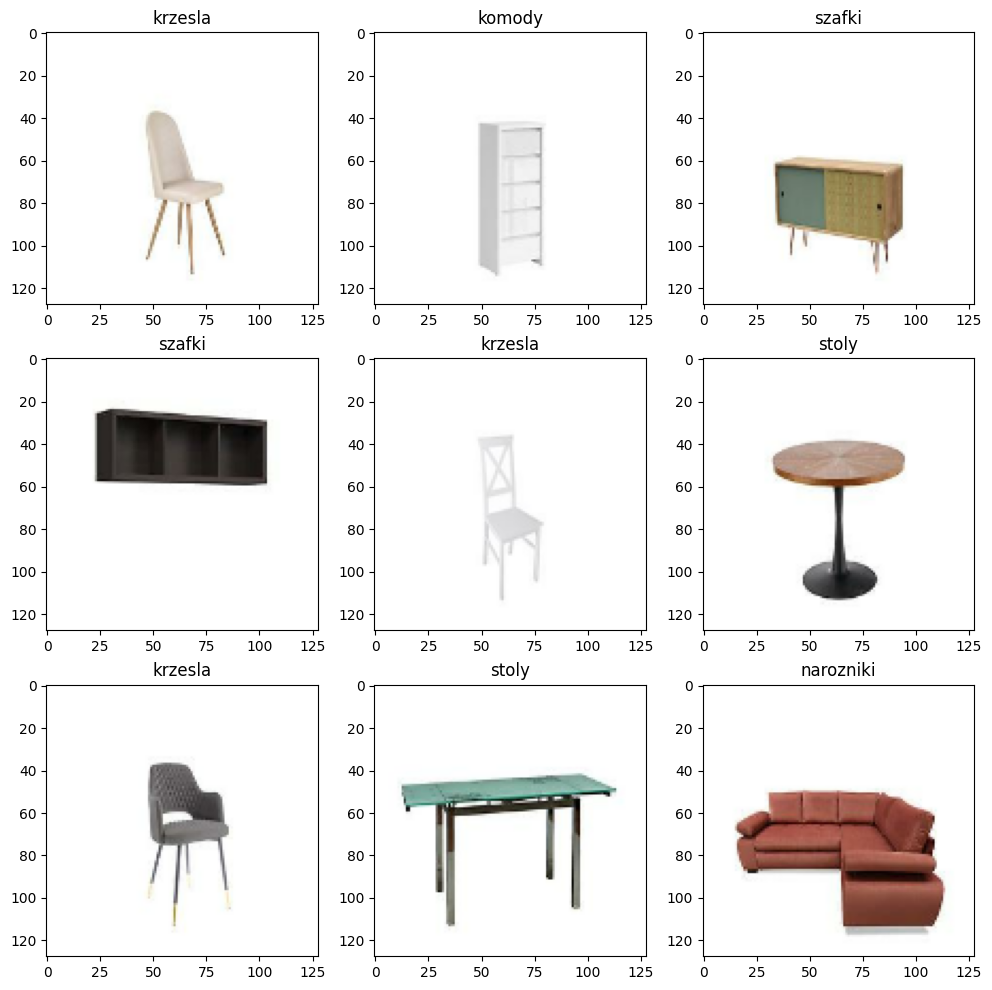

In [ ]:
class_names = train_ds.class_names

plt.figure(figsize=(12, 12))

for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype('uint8'))
        plt.title(class_names[labels[i].numpy().tolist().index(1)])
plt.show()

# Functions - Functions for saving and loading models and training history

Model saving function



In [ ]:
path = 'drive/MyDrive/project_computer_vision/'
os.makedirs(path + 'model', exist_ok=True)

model_path = 'drive/MyDrive/project_computer_vision/model/'

def save_model(model_keras, model_path, name):
  model_keras.save(model_path + str(name) + '.keras')

Model loading function

In [ ]:
model_path = 'drive/MyDrive/project_computer_vision/model/'
model_list = ['model_1.keras', 'model_2.keras', 'model_3.keras', 'model_4.keras',
              'model_5.keras', 'model_6.keras', 'model_7.keras', 'model_8.keras',
              'model_9.keras']


def load_all_models(model_list):
  loded_model_list = []
  for i in model_list:
    loded_model_list.append(keras.models.load_model(model_path + i))
  return loded_model_list

In [ ]:
loded_model_list = load_all_models(model_list)
model_1 = loded_model_list[0]
model_2 = loded_model_list[1]
model_3 = loded_model_list[2]
model_4 = loded_model_list[3]
model_5 = loded_model_list[4]
model_6 = loded_model_list[5]
model_7 = loded_model_list[6]
model_8 = loded_model_list[7]
model_9 = loded_model_list[8]

History saving function

In [ ]:
path = 'drive/MyDrive/project_computer_vision/'
os.makedirs(path + 'history', exist_ok=True)

model_history_path = 'drive/MyDrive/project_computer_vision/history/'

In [ ]:
def saving_history(history_number, name):
  np.save(f'drive/MyDrive/project_computer_vision/history/{name}' + '.npy', history_number)

History loading function

In [ ]:
model_history_path = 'drive/MyDrive/project_computer_vision/history/'
history_list = ['history_1.npy', 'history_2.npy', 'history_3.npy', 'history_4.npy', 'history_5.npy', 'history_6.npy', 'history_7.npy', 'history_8.npy',
                'history_9.npy']


def load_history(history_list):
  loded_history_list = []
  for i in history_list:
    loded_history_list.append(np.load(model_history_path + i, allow_pickle='TRUE').item())
  return loded_history_list

In [ ]:
loded_history_list = load_history(history_list)
history_1 = loded_history_list[0]
history_2 = loded_history_list[1]
history_3 = loded_history_list[2]
history_4 = loded_history_list[3]
history_5 = loded_history_list[4]
history_6 = loded_history_list[5]
history_7 = loded_history_list[6]
history_8 = loded_history_list[7]
history_9 = loded_history_list[8]

Function drawing loss curves

In [ ]:
def plot_loss_curves_model(history_number, number_of_model):
  fig, ax = plt.subplots()

  plt.plot(history_number.epoch, history_number.history['val_loss'], 'b', label= f'History {number_of_model} - Validation Loss')
  plt.plot(history_number.epoch, history_number.history['loss'], 'b--', label= f'History {number_of_model} - Training Loss')

  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.title(f'Loss Curves - Model {number_of_model}')

  plt.legend()
  plt.show()

Function drawing acc curves

In [ ]:
def plot_accuracy_curves_model(history_number, number_of_model):
  fig, ax = plt.subplots()

  plt.plot(history_number.epoch, history_number.history['val_accuracy'], 'b', label= f'History {number_of_model} - Validation Accuracy')
  plt.plot(history_number.epoch, history_number.history['accuracy'], 'b--', label= f'History {number_of_model} - Training Accuracy')

  plt.xlabel('Epochs')
  plt.ylabel('ACC')
  plt.title(f'Accuracy Curves - Model {number_of_model}')

  plt.legend()
  plt.show()

#Models

The Sequential model is a type of deep learning model in the field of artificial intelligence and machine learning. It is one of the simplest and most commonly used models in building neural networks. The Sequential model is primarily used for building feedforward neural networks, where data flows sequentially from one layer to another.

Create a Sequential model using the add() method.

Rescaling, also known as normalization, is a common data preprocessing technique used to bring all the features of the input data to a similar scale

**Convolutional Layer**

2D convolution layer(Conv2D) creates a convolution kernel that is convolved with the layer input to produce a tensor of outputs.The convolutional layer is responsible for feature extraction from the input data, which is typically 2D data such as images.

The first argument is the number of filters (also known as kernels) in the convolutional layer.

The second argument is the size of each filter. In this case, each filter has a size of 3x3. Smaller filter sizes are commonly used to capture local patterns.

The padding parameter determines how the convolution is applied to the input. Setting it to 'same' means that zero-padding will be added to the input data in such a way that the output feature map will have the same spatial dimensions as the input. This helps in avoiding information loss at the edges of the input.

The input_shape parameter defines the shape of the input data that the model expects. In this case, the input data is assumed to be 3-channel (RGB) images with width img_width, height img_height, and 3 color channels (R, G, B).

 **Max-pooling**

Max-pooling is a down-sampling technique used to reduce the spatial dimensions of the feature maps while retaining the most important information. It helps in reducing the computational complexity of the model and aids in preventing overfitting. The argument passed to MaxPool2D represents the size of the pooling window. In this case, a 2x2 window is used for pooling. Max-pooling works by taking the maximum value within each window and discarding the other values.

**Flatten, Dense and Softmax Activation in CNNs**

The Flatten layer is another common layer in deep learning models, particularly in CNNs. Its purpose is to flatten the multi-dimensional input into a one-dimensional vector.

---
CZY TO ZOSTAWIĆ?????

Dense(7): This adds a fully connected layer (Dense layer) with 7 units. Each neuron in this layer will be connected to all the neurons in the previous layer.

The softmax activation function is used for the output layer in multiclass classification problems. It converts the raw output scores of the neurons into a probability distribution, where each value represents the probability of the input belonging to a particular class.

PO POLSKU:


Model sekwencyjny to rodzaj modelu głębokiego uczenia się w dziedzinie sztucznej inteligencji i uczenia maszynowego. Jest to jeden z najprostszych i najczęściej używanych modeli do budowy sieci neuronowych. Model sekwencyjny jest głównie stosowany do budowy sieci neuronowych przekazujących (feedforward), gdzie dane płyną sekwencyjnie z jednej warstwy do drugiej.

Aby stworzyć model sekwencyjny, używa się metody add().

Skalowanie, znane także jako normalizacja, to powszechna technika przetwarzania danych używana do doprowadzenia wszystkich cech danych wejściowych do podobnej skali.

Warstwa konwolucyjna

Warstwa konwolucyjna 2D (Conv2D) tworzy jądro konwolucyjne, które jest konwoluowane z danymi wejściowymi warstwy, aby wyprodukować tensor wyników. Warstwa konwolucyjna jest odpowiedzialna za ekstrakcję cech z danych wejściowych, które zazwyczaj są danymi 2D, takimi jak obrazy.

Pierwszy argument to liczba filtrów (znanych także jako jądra) w warstwie konwolucyjnej.

Drugi argument to rozmiar każdego filtra. W tym przypadku każdy filtr ma rozmiar 3x3. Mniejsze rozmiary filtrów są powszechnie używane do wykrywania lokalnych wzorców.

Parametr padding określa, jak konwolucja jest stosowana do danych wejściowych. Ustawienie go na 'same' oznacza, że zostanie dodane dopełnienie zerowe do danych wejściowych w taki sposób, że mapa cech wynikowa będzie miała takie same wymiary przestrzenne jak dane wejściowe. Pomaga to uniknąć utraty informacji na krawędziach danych wejściowych.

Parametr input_shape definiuje kształt danych wejściowych, których oczekuje model. W tym przypadku zakłada się, że dane wejściowe to obrazy 3-kanałowe (RGB) o szerokości img_width, wysokości img_height i 3 kanałach kolorów (R, G, B).

Max-pooling

Max-pooling to technika zmniejszania wymiarów przestrzennych map cech przy zachowaniu najważniejszych informacji. Pomaga to zmniejszyć złożoność obliczeniową modelu i pomaga w zapobieganiu przeuczeniu. Argument przekazywany do MaxPool2D reprezentuje rozmiar okna grupującego (pooling window). W tym przypadku używane jest okno 2x2 do grupowania. Max-pooling działa poprzez wybieranie największej wartości w każdym oknie i odrzucanie pozostałych wartości.

Warstwa Flatten, Dense i funkcja aktywacji Softmax w sieciach CNN

Warstwa Flatten to kolejna powszechna warstwa w modelach uczenia głębokiego, szczególnie w sieciach konwolucyjnych (CNN). Jej celem jest spłaszczenie wielowymiarowego wejścia do wektora jednowymiarowego.

Dense(7): Dodaje warstwę w pełni połączoną (warstwa Dense) z 7 jednostkami. Każdy neuron w tej warstwie będzie połączony z neuronami w poprzedniej warstwie.

Funkcja aktywacji softmax jest używana na warstwie wyjściowej w problemach klasyfikacji wieloklasowej. Konwertuje surowe wyniki wyjściowe neuronów na rozkład prawdopodobieństwa, gdzie każda wartość reprezentuje prawdopodobieństwo przynależności wejścia do konkretnej klasy.

## model_1 - Basic model

Baseline model checking of convolutional neural networks (CNN).

In [ ]:
model_1 = Sequential()

model_1.add(layers.Rescaling(1./255))
model_1.add(layers.Conv2D(32,(3,3),
                        padding='same',
                        activation='relu',
                        input_shape=(img_width, img_height, 3)))
model_1.add(layers.MaxPool2D((2,2)))

model_1.add(layers.Conv2D(16,(3,3),
                        padding='same',
                        activation='relu'))
model_1.add(layers.MaxPool2D((2,2)))


model_1.add(layers.Flatten())

model_1.add(layers.Dense(64, activation='relu'))
model_1.add(layers.Dense(7, activation='softmax'))

The compilation process is an important step in building a machine learning model using the Keras library (which is now a part of TensorFlow). It is performed before training the model and involves defining three key components of the model:

- **Optimizer**: The optimizer is responsible for updating the model's weights during the training process. Its task is to minimize the loss function by adjusting the model's weights based on the gradients of the loss function. In this case, we use the "adam" optimizer, which is a popular and effective optimizer commonly used in machine learning.

- **Loss function**: The loss function measures the deviation of the model's predictions from the true labels. The optimization aims to minimize this function to achieve the best model performance. For multi-class classification tasks, such as "categorical_crossentropy," this loss function is commonly used.

- **Metrics**: Metrics are additional indicators used to evaluate the model's performance but do not affect the actual training process. In this case, we use the "accuracy" metric, which is a popular measure of classification accuracy, representing the ratio of correctly classified samples to all samples.

After the model has been compiled, it is ready to start the training process using the *model_1.fit()* function by providing the appropriate training data and labels.

POLSKI DO USUNIĘCIA !!!!

Proces kompilacji jest ważnym etapem w budowie modelu uczenia maszynowego w bibliotece Keras (która jest teraz częścią TensorFlow). Wykonuje się go przed treningiem modelu. Podczas kompilacji, definiujemy trzy kluczowe elementy modelu:

Optimizer (optymalizator): Optymalizator odpowiada za aktualizację wag modelu w trakcie uczenia. Jego zadaniem jest minimalizacja funkcji straty (loss function) poprzez dostosowanie wag modelu na podstawie gradientów funkcji straty. W tym przypadku, używamy optymalizatora "adam", który jest popularnym i skutecznym optymalizatorem stosowanym w uczeniu maszynowym.

Loss function (funkcja straty): Funkcja straty jest miarą odchylenia wyników modelu od rzeczywistych etykiet. Celem optymalizacji jest minimalizacja tej funkcji, aby model osiągnął najlepsze wyniki. W przypadku wieloklasowej klasyfikacji, takiej jak na przykład "categorical_crossentropy", używa się tej funkcji straty.

Metrics (metryki): Metryki to dodatkowe wskaźniki używane do oceny jakości modelu, ale nie wpływają na sam proces uczenia. W tym przypadku, używamy metryki "accuracy", która jest popularną miarą trafności klasyfikacji, czyli stosunek poprawnie zaklasyfikowanych próbek do wszystkich próbek.

Po wykonaniu kompilacji modelu, model gotowy jest do rozpoczęcia procesu uczenia (trenowania) za pomocą funkcji model_1.fit(), podając odpowiednio dane treningowe i etykiety.


In [ ]:
model_1.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics= ['accuracy'])


The code is executing the training process for a machine learning model. Explanation of the purpose of each parameter in the *model_1.fit()* function:

- **train_ds**: This parameter represents the training dataset. It contains input samples and their corresponding target (ground truth) labels. The model will be trained on this dataset to learn patterns and relationships between inputs and outputs.

- **validation_data**: This parameter is optional and represents the validation dataset. It is used to evaluate the model's performance on data that it has not seen during training. The model's performance on the validation data is monitored after each epoch to detect overfitting and assess generalization capabilities.

- **epochs**: This parameter specifies the number of epochs, which is the number of times the model will iterate over the entire training dataset during the training process. Each epoch consists of one forward pass and one backward pass (optimization step) through the entire dataset.

- **batch_size**: This parameter defines the number of samples that will be propagated through the model at once before updating the model's weights. It is common to use batch training instead of updating the weights after each individual sample to make the training process more efficient.

During the *model_1.fit()* process, the model will be trained using the training data (*train_ds*) by minimizing the defined loss function (specified during model compilation) using the selected optimizer (also specified during model compilation). The model's performance on the validation data (*val_ds*) will be evaluated after each epoch. The training process will repeat for the specified number of epochs, updating the model's weights to improve its performance over time.

The output of *model_1.fit()* is a *history* object that contains information about the model's performance during training, such as the loss and accuracy values for each epoch. This information can be useful for analyzing the training progress and identifying possible issues, like overfitting or underfitting.

PO POLSKU

Kod, który podałeś, wykonuje proces uczenia (trenowania) modelu uczenia maszynowego. Wyjaśniam cel każdego z parametrów w funkcji model_1.fit():

train_ds: Ten parametr reprezentuje zbiór treningowy. Zawiera próbki wejściowe oraz odpowiadające im etykiety docelowe (ground truth). Model będzie uczył się na tym zbiorze danych w celu wykrycia wzorców i relacji między wejściami a wyjściami.

validation_data: Ten parametr jest opcjonalny i reprezentuje zbiór walidacyjny. Służy do oceny wydajności modelu na danych, których nie widział podczas uczenia. Wydajność modelu na danych walidacyjnych jest monitorowana po każdej epoce, aby wykryć przeuczenie i ocenić zdolności generalizacji.

epochs: Ten parametr określa liczbę epok, czyli ilość razy, jaką model przejdzie przez cały zbiór treningowy w trakcie procesu uczenia. Każda epoka składa się z jednego kroku w przód (forward pass) oraz jednego kroku w tył (backpropagation) przez cały zbiór danych.

batch_size: Ten parametr określa liczbę próbek, które będą propagowane przez model jednocześnie, zanim nastąpi aktualizacja wag modelu. Używa się treningu partiami (batch training) zamiast aktualizowania wag po każdej pojedynczej próbce, aby uczynić proces uczenia bardziej wydajnym.

Podczas procesu model_1.fit(), model będzie trenowany na danych treningowych (train_ds), minimalizując zdefiniowaną funkcję straty (określoną podczas kompilacji modelu) za pomocą wybranego optymalizatora (również określonego podczas kompilacji modelu). Wydajność modelu na danych walidacyjnych (val_ds) będzie oceniana po każdej epoce. Proces uczenia będzie się powtarzać przez określoną liczbę epok, aktualizując wagi modelu w celu poprawy jego wydajności w miarę czasu.

Wynikiem funkcji model_1.fit() jest zazwyczaj obiekt history, który zawiera informacje na temat wydajności modelu w trakcie uczenia, takie jak wartości funkcji straty (loss) i trafności (accuracy) dla każdej epoki. Te informacje mogą być przydatne do analizy postępów uczenia i identyfikacji możliwych problemów, takich jak przeuczenie lub niedouczenie modelu

In [ ]:
history_1 = model_1.fit(train_ds,
                        validation_data = val_ds,
                        epochs = 25,
                        batch_size= 32)

Epoch 1/25
29/29 [==============================] - 14s 432ms/step - loss: 1.7417 - accuracy: 0.3789 - val_loss: 1.4029 - val_accuracy: 0.4400
Epoch 2/25
29/29 [==============================] - 12s 403ms/step - loss: 1.0798 - accuracy: 0.5967 - val_loss: 0.9117 - val_accuracy: 0.6356
Epoch 3/25
29/29 [==============================] - 12s 421ms/step - loss: 0.7757 - accuracy: 0.7233 - val_loss: 0.6388 - val_accuracy: 0.7911
Epoch 4/25
29/29 [==============================] - 13s 425ms/step - loss: 0.5476 - accuracy: 0.8122 - val_loss: 0.5488 - val_accuracy: 0.8133
Epoch 5/25
29/29 [==============================] - 12s 422ms/step - loss: 0.4467 - accuracy: 0.8556 - val_loss: 0.4621 - val_accuracy: 0.8533
Epoch 6/25
29/29 [==============================] - 13s 424ms/step - loss: 0.3677 - accuracy: 0.8800 - val_loss: 0.4915 - val_accuracy: 0.8311
Epoch 7/25
29/29 [==============================] - 13s 422ms/step - loss: 0.2963 - accuracy: 0.9089 - val_loss: 0.4586 - val_accuracy: 0.8444

The *model_1.summary()* function is used to display a summary of the machine learning model's structure. After constructing the model (e.g., using the Keras or TensorFlow library), the *summary()* function provides a quick and concise overview of the built model.

The key information included in the summary is as follows:

- **Layer Name**: It shows the name of each layer in the model, making it easy to identify the layers present in the model.

- **Layer Type**: It specifies the type of each layer (e.g., dense, convolutional, recurrent, etc.), providing insight into the operations performed on data by each layer.

- **Output Shape**: It displays the dimensions of the output data from each layer, helping to understand how data changes as it passes through the model.

- **Parameters**: It shows the number of parameters (weights) in each layer and the total number of parameters in the entire model. These parameters are optimized during the learning process to allow the model to learn appropriate data representations.

- **Total params**: It presents the total number of parameters (i.e., weights and biases) in the model, enabling an assessment of the model's complexity and potential computational resource requirements.

The summary is particularly useful when we want to quickly understand the architecture and size of the model and ensure that it has been constructed correctly. It also helps analyze which layers have the most significant impact on solving the problem and where potential changes can be made to optimize the model.

PO POLSKU:


Funkcja model_1.summary() służy do wyświetlenia podsumowania struktury modelu uczącego maszynowego. Po skonstruowaniu modelu (np. za pomocą biblioteki Keras lub TensorFlow), funkcja summary() pozwala uzyskać szybki i zwięzły przegląd zbudowanego modelu.

Podstawowe informacje, które zawiera podsumowanie, to:

Nazwa warstwy: Wyświetla nazwę każdej warstwy modelu, dzięki czemu można łatwo zidentyfikować, jakie warstwy są obecne w modelu.

Typ warstwy: Określa rodzaj warstwy (np. warstwa gęsta, konwolucyjna, rekurencyjna itp.), co pozwala na zrozumienie, jakie operacje są wykonywane na danych przez poszczególne warstwy.

Rozmiar wyjścia (Output Shape): Wyświetla wymiary danych wyjściowych z każdej warstwy, co pomaga zrozumieć, jak zmieniają się dane w miarę przechodzenia przez model.

Parametry: Pokazuje liczbę parametrów (wagi) w każdej warstwie oraz całkowitą liczbę parametrów w całym modelu. Parametry te są optymalizowane podczas procesu uczenia, aby model nauczył się odpowiednich reprezentacji danych.

Ilość parametrów: Wyświetla łączną liczbę parametrów (tj. wag i biasów) w modelu, co pozwala ocenić złożoność modelu i ewentualne wymagania zasobów obliczeniowych.

Podsumowanie jest szczególnie użyteczne w momencie, gdy chcemy szybko zrozumieć architekturę i wielkość modelu oraz upewnić się, że został on poprawnie zbudowany. Pozwala również na analizę, jakie warstwy mają największy wpływ na rozwiązywany problem i gdzie ewentualnie można dokonać zmian w celu optymalizacji modelu.


In [ ]:
model_1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 128, 128, 3)       0         
                                                                 
 conv2d_4 (Conv2D)           (None, 128, 128, 32)      896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 64, 64, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 64, 64, 16)        4624      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 32, 32, 16)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 16384)            

The code you provided is used to evaluate the performance of the trained machine learning model on a test dataset. Let me explain the purpose of each line:

- **loss_1, accuracy_1 = model_1.evaluate(test_ds)**:
  - The *model_1.evaluate(test_ds)* function computes the loss and metrics (including accuracy) of the model on the test dataset (*test_ds*).
  - The variable *loss_1* will store the computed loss value, which indicates the difference between the model's predictions and the actual labels in the test dataset.
  - The variable *accuracy_1* will store the computed accuracy, which represents the percentage of correctly classified samples in the test dataset.
- **print("Test Accuracy:", accuracy_1)**:
  - This line prints the test accuracy of the model to the console or output terminal.
  - It shows how well the trained model performs on unseen data (test dataset).
  - The test accuracy is a crucial measure to assess the model's generalization capability, i.e., how well it can make accurate predictions on data it has never encountered during training.

The evaluation on the test dataset is a critical step to validate the model's performance on new, unseen data. It helps in understanding how well the model is likely to perform in real-world scenarios and whether it has generalized well to handle different data distributions beyond the training set. High accuracy on the test dataset indicates a good model, whereas significant performance discrepancies between training and test accuracy might suggest overfitting or underfitting issues.

PO POLSKU


Podany kod służy do oceny wydajności wytrenowanego modelu uczenia maszynowego na zbiorze testowym. Wyjaśniam cel każdej linii:

loss_1, accuracy_1 = model_1.evaluate(test_ds):

Funkcja model_1.evaluate(test_ds) oblicza wartość funkcji straty (loss) oraz metryki (w tym trafność - accuracy) modelu na zbiorze testowym (test_ds).
Zmienna loss_1 przechowuje obliczoną wartość funkcji straty, która wskazuje na różnicę między przewidywaniami modelu a rzeczywistymi etykietami w zbiorze testowym.
Zmienna accuracy_1 przechowuje obliczoną trafność, która reprezentuje procentowo poprawnie sklasyfikowanych próbek w zbiorze testowym.
print("Test Accuracy:", accuracy_1):

Ta linia wyświetla na konsoli lub w terminalu wynik trafności modelu na zbiorze testowym.
Pokazuje, jak dobrze wytrenowany model radzi sobie na nowych, nieznanych danych (zbiorze testowym).
Trafność na zbiorze testowym jest istotnym wskaźnikiem, który pozwala ocenić zdolność generalizacji modelu, czyli to, jak dobrze model potrafi dokonywać trafnych predykcji na danych, których nie widział podczas treningu.
Ocena na zbiorze testowym to kluczowy krok w walidacji wydajności modelu na nowych, niewidzianych danych. Pomaga zrozumieć, jak dobrze model może radzić sobie w prawdziwych scenariuszach i czy dobrze potrafi uogólniać do różnych rozkładów danych poza zbiorem treningowym. Wysoka trafność na zbiorze testowym wskazuje na dobry model, podczas gdy znaczne różnice między trafnościami treningową a testową mogą sugerować problemy z przeuczeniem lub niedouczeniem modelu.

In [ ]:
loss_1, accuracy_1 = model_1.evaluate(test_ds)
print('Test Accuracy:', accuracy_1)

9/9 [==============================] - 2s 175ms/step - loss: 0.3273 - accuracy: 0.9173
Test Accuracy: 0.9172661900520325


The **save_model(model_1, model_path, "model_1")** function is used to save a trained machine learning model to disk for future use or sharing.

Explanation of each parameter:

- **model_1**: This parameter represents the trained model that we want to save. The model have been previously defined and trained.

- **model_path**: This is the path to the folder where the model will be saved.

- **"model_1"**: This is the name of the model file under which it will be saved on disk. You can use any name that helps identify the saved model.

After executing the **save_model** function, the trained model will be saved in a format that allows it to be recreated later. This enables using and evaluating the model on new data without having to retrain it from scratch. Saving the model to disk is particularly important when the model requires a long training time or when it needs to be used in different environments or applications.

PO POLSKU

Funkcja save_model(model_1, model_path, "model_1") służy do zapisania wytrenowanego modelu uczenia maszynowego na dysku w celu późniejszego użycia lub udostępnienia.

Wyjaśniam cel każdego parametru:

model_1: Ten parametr reprezentuje wytrenowany model, który chcemy zapisać. Model ten powinien być wcześniej zdefiniowany i wytrenowany przy użyciu biblioteki Keras lub TensorFlow.

model_path: To jest ścieżka do folderu, w którym zostanie zapisany model. Można wskazać bezwzględną lub względną ścieżkę w systemie plików.

"model_1": Jest to nazwa pliku modelu, pod jaką będzie zapisany na dysku. Można użyć dowolnej nazwy, która pomoże zidentyfikować zapisany model.

Po wykonaniu funkcji save_model, wytrenowany model zostanie zapisany w formacie, który pozwoli go później odtworzyć. To umożliwia używanie i ocenianie modelu na nowych danych bez konieczności ponownego uczenia go od początku. Zapisanie modelu na dysku jest szczególnie ważne, gdy model wymaga długiego czasu treningu lub gdy chcemy go wykorzystać w innych środowiskach lub aplikacjach. Dzięki zapisowi modelu możemy go łatwo przenosić i udostępniać innym użytkownikom lub zespołom, aby wykorzystać jego zdolności predykcyjne w różnych scenariuszach.

In [ ]:
save_model(model_1,model_path, 'model_1')

The function **saving_history(history_1, "history_1")** is used to save the history of the model's training process to disk. The history contains information about the model's performance during training, such as the values of the loss function and metrics (e.g., accuracy) on the training and validation datasets in each epoch.

Explanation of each parameter:

- **history_1**: This parameter represents the history of the model's training process, which includes the training results at different epochs. This history can be obtained as the output of the **model_1.fit()** function during model training.

- **"history_1"**: This is the file name under which the history will be saved on disk. You can use any name that helps identify the saved history.

Saving the training history is useful when we want to analyze the progress of the model's training and compare its performance on the training and validation datasets across different epochs. By saving the history, we can later reproduce and study how well the model learned or if there were any issues like overfitting or underfitting. Additionally, the saved history can be useful for presenting training results, archiving training data, or comparing models with different training parameters.

PO POLSKU

Funkcja saving_history(history_1, "history_1") służy do zapisania historii procesu uczenia modelu na dysku. Historia zawiera informacje o wydajności modelu podczas treningu, takie jak wartości funkcji straty (loss) i metryki (np. trafność - accuracy) na zbiorze treningowym i walidacyjnym w kolejnych epokach.

Wyjaśniam cel każdego parametru:

history_1: Ten parametr reprezentuje historię procesu uczenia modelu, która zawiera wyniki uczenia w różnych epokach. Historia ta może być zwrócona jako wynik funkcji model_1.fit() podczas treningu modelu.

"history_1": Jest to nazwa pliku, pod jaką zostanie zapisana historia na dysku. Można użyć dowolnej nazwy, która pomoże zidentyfikować zapisaną historię.

Zapisanie historii uczenia jest użyteczne, gdy chcemy analizować postęp treningu modelu i porównywać wydajność na zbiorze treningowym i walidacyjnym w kolejnych epokach. Możemy później odtworzyć zapisaną historię, aby zrozumieć, czy model poprawnie się uczył, czy też występował problem przeuczenia lub niedouczenia. Ponadto, zapisana historia może być przydatna do prezentacji wyników treningu, archiwizacji danych z treningu lub analizy modeli z różnymi parametrami treningu.

In [ ]:
saving_history(history_1, 'history_1')

The function **plot_loss_curves_model(history_1, 1)** is used to visualize the loss curves during the model training process.

Explanation of each parameter:

- **history_1**: This parameter represents the history of the model's training process, which contains information about the model's performance in each epoch. It is the output of the **model_1.fit() ** function during training.

- **1**: This parameter indicates the index of the model. It can be used if we have multiple models, and we want to compare their histories, or if we have only one model, and the index is used in the plot's name to identify a specific model.

Visualizing the loss curves aims to help understand how the loss value changes as the training progresses. The plot shows whether the model is learning correctly (reducing the loss) or if there might be overfitting (decreasing loss on the training set but increasing on the validation set). It also allows assessing whether the model is adequately trained, even after the loss curve stabilizes. Visualizing these curves helps in analyzing the model's performance and identifying appropriate points to stop the training (if necessary) to avoid overfitting and ensure model optimization.

PO POLSKU

Funkcja plot_loss_curves_model(history_1, 1) służy do wizualizacji krzywych funkcji straty (loss) podczas procesu uczenia modelu.

Wyjaśnienie każdego parametru:

history_1: Ten parametr reprezentuje historię procesu uczenia modelu, która zawiera informacje o wydajności modelu w kolejnych epokach. Jest to wynik funkcji model_1.fit() podczas treningu.

1: Ten parametr wskazuje na indeks modelu. Może być używany, jeśli mamy wiele modeli, których historie chcemy porównać, lub jeśli mamy jedynie jeden model, a indeks jest używany w nazwie wykresu w celu zidentyfikowania konkretnego modelu.

Wizualizacja krzywych funkcji straty ma na celu pomóc w zrozumieniu, jak zmienia się wartość funkcji straty w miarę postępu treningu. Wykres pokazuje, czy model uczy się poprawnie (zmniejszanie straty) czy też może występuje przeuczenie (zmniejszanie straty na zbiorze treningowym, ale wzrost na zbiorze walidacyjnym). Umożliwia również ocenę, czy model jest odpowiednio nauczony (nawet po ustabilizowaniu się krzywej straty). Wizualizacja tych krzywych pomaga w analizie wydajności modelu i identyfikacji odpowiednich punktów przerwania treningu (jeśli jest to konieczne), aby uniknąć przeuczenia i zapewnić optymalizację modelu.

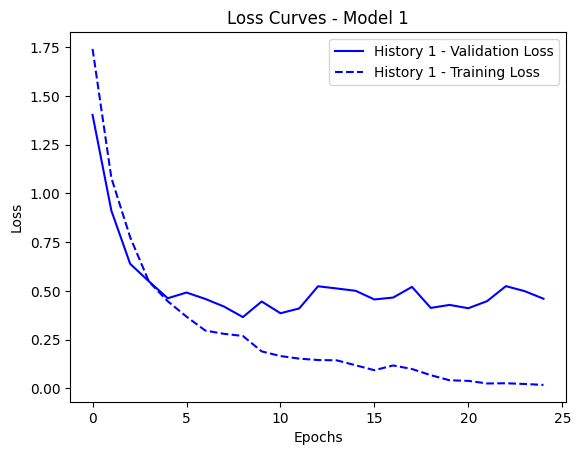

In [ ]:
plot_loss_curves_model(history_1, '1')

NAPISAĆ WNIOSEK Z WYKRESU !!!!!!!!!!!!!!

The function **plot_accuracy_curves_model(history_1, 1)** is used to visualize the accuracy curves during the model training process.

Visualizing the accuracy curves aims to help understand how the accuracy of the model changes as the training progresses. The plot shows whether the model is learning correctly (increasing accuracy) or if there might be overfitting (high accuracy on the training set but lower on the validation set). It also allows assessing the stability of the model's accuracy on the validation set, enabling the identification of an appropriate point to stop the training (if necessary) to avoid overfitting and achieve optimal model performance. Visualizing these curves is useful for analyzing the model's accuracy and helps in making decisions regarding further training or potential modifications to improve the results.

PO POLSKU


Funkcja plot_accuracy_curves_model(history_1, 1) służy do wizualizacji krzywych trafności (accuracy) podczas procesu uczenia modelu.

Wizualizacja krzywych trafności (accuracy) ma na celu pomóc w zrozumieniu, jak zmienia się trafność modelu w miarę postępu treningu. Wykres pokazuje, czy model poprawnie się uczy (zwiększanie trafności) czy też może występuje przeuczenie (wysoka trafność na zbiorze treningowym, ale niższa na zbiorze walidacyjnym). Umożliwia również ocenę stabilizacji trafności modelu na zbiorze walidacyjnym, co pozwala zidentyfikować odpowiedni punkt zatrzymania treningu (jeśli jest to konieczne) w celu uniknięcia przeuczenia i osiągnięcia optymalnej wydajności modelu. Wizualizacja tych krzywych jest przydatna do analizy trafności modelu i pomaga w podejmowaniu decyzji dotyczących dalszego treningu modelu lub ewentualnych modyfikacji w celu poprawy wyników.

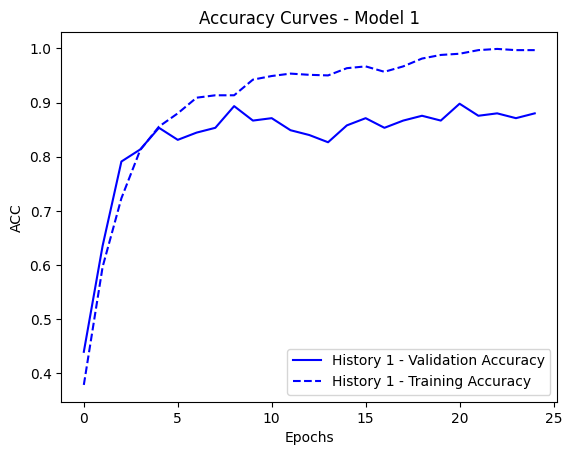

In [ ]:
plot_accuracy_curves_model(history_1, '1')

NAPISAĆ WNIOSEK Z WYKRESU !!!!!!!!!!!!!!

**CONCLUSIONS**:

Overfitting has occurred. It is likely that the training dataset is too small in relation to the validation dataset. Therefore, the dataset should be increased with images of furniture.
This means that the network is 'learning the training set' rather than generalising the classification.

PO POLSKU:

Wystąpiło nadmierne dopasowanie. Prawdopodobnie zestaw danych treningowych jest zbyt mały w porównaniu do zestawu danych walidacyjnych. Dlatego zestaw danych powinien zostać powiększony o obrazy mebli.
Oznacza to, że sieć "uczy się zestawu treningowego" zamiast uogólniać klasyfikację.

## model_2 - Increased number of neurons

More neurons increase the model's capacity to capture complex patterns and relationships in the data. A larger neural network can represent more intricate functions, which can be beneficial for tasks with high complexity.

PO POLSKU


Większa liczba neuronów zwiększa zdolność modelu do wychwytywania złożonych wzorców i relacji w danych. Większa sieć neuronowa może reprezentować bardziej skomplikowane funkcje, co może być korzystne w przypadku zadań o dużej złożoności.

In [ ]:
model_2 = Sequential()

model_2.add(layers.Rescaling(1./255))
model_2.add(layers.Conv2D(128,(3,3),
                        padding='valid',
                        activation='relu',
                        input_shape=(img_width, img_height, 3)))
model_2.add(layers.MaxPool2D((2,2)))

model_2.add(layers.Conv2D(64,(3,3),
                        padding='valid',
                        activation='relu'))
model_2.add(layers.MaxPool2D((2,2)))


model_2.add(layers.Flatten())

model_2.add(layers.Dense(256, activation='relu'))
model_2.add(layers.Dense(7, activation='softmax'))

In [ ]:
model_2.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics= ['accuracy'])

In [ ]:
history_2 = model_2.fit(train_ds,
                        validation_data= val_ds,
                        epochs = 25,
                        batch_size= 32)

Epoch 1/25
29/29 [==============================] - 266s 7s/step - loss: 1.8852 - accuracy: 0.4533 - val_loss: 1.0662 - val_accuracy: 0.5733
Epoch 2/25
29/29 [==============================] - 116s 4s/step - loss: 0.6969 - accuracy: 0.7544 - val_loss: 0.6510 - val_accuracy: 0.7867
Epoch 3/25
29/29 [==============================] - 117s 4s/step - loss: 0.4117 - accuracy: 0.8567 - val_loss: 0.5547 - val_accuracy: 0.8089
Epoch 4/25
29/29 [==============================] - 107s 4s/step - loss: 0.3000 - accuracy: 0.8944 - val_loss: 0.4971 - val_accuracy: 0.8444
Epoch 5/25
29/29 [==============================] - 114s 4s/step - loss: 0.2662 - accuracy: 0.9100 - val_loss: 0.5683 - val_accuracy: 0.8267
Epoch 6/25
29/29 [==============================] - 102s 4s/step - loss: 0.2037 - accuracy: 0.9233 - val_loss: 0.4751 - val_accuracy: 0.8533
Epoch 7/25
29/29 [==============================] - 105s 4s/step - loss: 0.1929 - accuracy: 0.9289 - val_loss: 0.6494 - val_accuracy: 0.8444
Epoch 8/25
29

In [ ]:
model_2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 128, 128, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 126, 126, 128)     3584      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 128)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 64)        73792     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 57600)             0

In [ ]:
loss_2, accuracy_2 = model_2.evaluate(test_ds)
print('Test Accuracy:', accuracy_2)

9/9 [==============================] - 8s 737ms/step - loss: 0.6482 - accuracy: 0.8993
Test Accuracy: 0.8992805480957031


In [ ]:
save_model(model_2,model_path, 'model_2')

In [ ]:
saving_history(history_2, 'history_2')

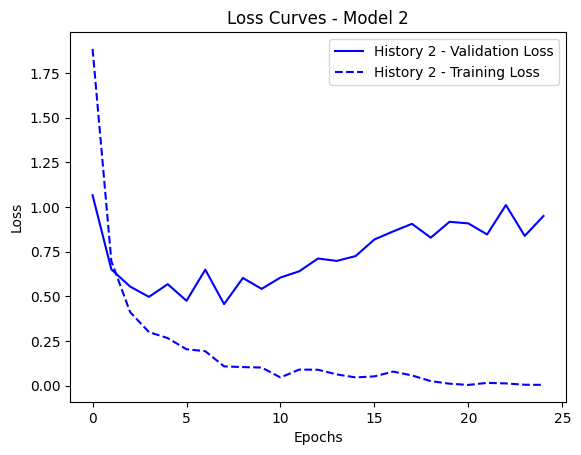

In [ ]:
plot_loss_curves_model(history_2, '2')

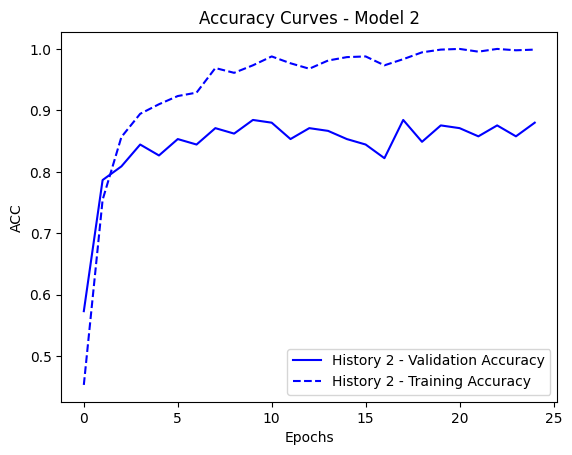

In [ ]:
plot_accuracy_curves_model(history_2, '2')

**CONCLUSIONS**:

Overfitting has occurred. Increasing the number of neurons worsens the loss curve for the training and validation sets.
The difference between validation and training loss is larger than for the network from model_1. This means that the network is 'learning the training set' rather than generalising the classification.

PO POLSKU


Wystąpiło nadmierne dopasowanie. Zwiększenie liczby neuronów pogarsza krzywą strat dla zestawów treningowych i walidacyjnych.
Różnica między stratą walidacyjną i treningową jest większa niż w przypadku sieci z modelu_1. Oznacza to, że sieć "uczy się zestawu treningowego" zamiast uogólniać klasyfikację.

## model_3 - Reduced number of neurons

Reducing the number of neurons in a Convolutional Neural Network can be a useful strategy in certain scenarios. Decreasing the number of neurons in a CNN can lead to a more compact and computationally efficient model, which is particularly beneficial when dealing with limited computational resources or memory constraints.

PO POLSKU:

Zmniejszenie liczby neuronów w konwolucyjnej sieci neuronowej może być przydatną strategią w niektórych scenariuszach. Zmniejszenie liczby neuronów w CNN może prowadzić do bardziej zwartego i wydajnego obliczeniowo modelu, co jest szczególnie korzystne w przypadku ograniczonych zasobów obliczeniowych lub ograniczeń pamięci.

In [ ]:
model_3 = Sequential()

model_3.add(layers.Rescaling(1./255))
model_3.add(layers.Conv2D(16,(3,3),
                        padding='valid',
                        activation='relu',
                        input_shape=(img_width, img_height, 3)))
model_3.add(layers.MaxPool2D((2,2)))

model_3.add(layers.Conv2D(16,(3,3),
                        padding='valid',
                        activation='relu'))
model_3.add(layers.MaxPool2D((2,2)))


model_3.add(layers.Flatten())

model_3.add(layers.Dense(32, activation='relu'))
model_3.add(layers.Dense(7, activation='softmax'))

In [ ]:
model_3.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics= ['accuracy'])

In [ ]:
history_3 = model_3.fit(train_ds,
                        validation_data= val_ds,
                        epochs = 25,
                        batch_size= 32)

Epoch 1/25
29/29 [==============================] - 79s 2s/step - loss: 1.4741 - accuracy: 0.4744 - val_loss: 1.0968 - val_accuracy: 0.5956
Epoch 2/25
29/29 [==============================] - 8s 254ms/step - loss: 0.8852 - accuracy: 0.6933 - val_loss: 0.7376 - val_accuracy: 0.7244
Epoch 3/25
29/29 [==============================] - 8s 272ms/step - loss: 0.5449 - accuracy: 0.8211 - val_loss: 0.6480 - val_accuracy: 0.7956
Epoch 4/25
29/29 [==============================] - 7s 227ms/step - loss: 0.4030 - accuracy: 0.8800 - val_loss: 0.4542 - val_accuracy: 0.8622
Epoch 5/25
29/29 [==============================] - 7s 240ms/step - loss: 0.3066 - accuracy: 0.9056 - val_loss: 0.5840 - val_accuracy: 0.7956
Epoch 6/25
29/29 [==============================] - 8s 275ms/step - loss: 0.3137 - accuracy: 0.8944 - val_loss: 0.3933 - val_accuracy: 0.8844
Epoch 7/25
29/29 [==============================] - 8s 275ms/step - loss: 0.2174 - accuracy: 0.9311 - val_loss: 0.3883 - val_accuracy: 0.8756
Epoch 8/

In [ ]:
model_3.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 128, 128, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 126, 126, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 16)        2320      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 16)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 14400)             0

In [ ]:
loss_3, accuracy_3 = model_3.evaluate(test_ds)
print('Test Accuracy:', accuracy_3)

9/9 [==============================] - 1s 106ms/step - loss: 0.6012 - accuracy: 0.8453
Test Accuracy: 0.8453237414360046


In [ ]:
save_model(model_3,model_path, 'model_3')

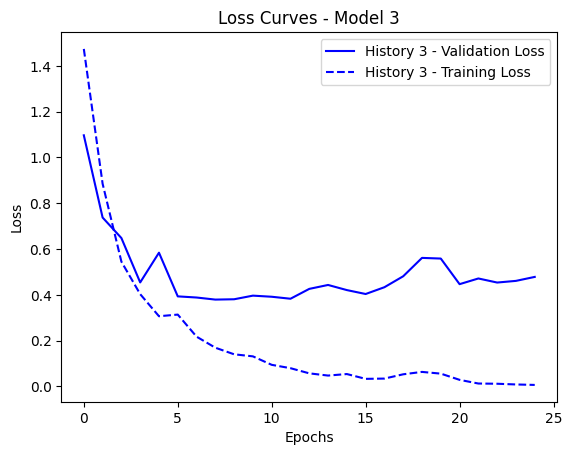

In [ ]:
plot_loss_curves_model(history_3, '3')

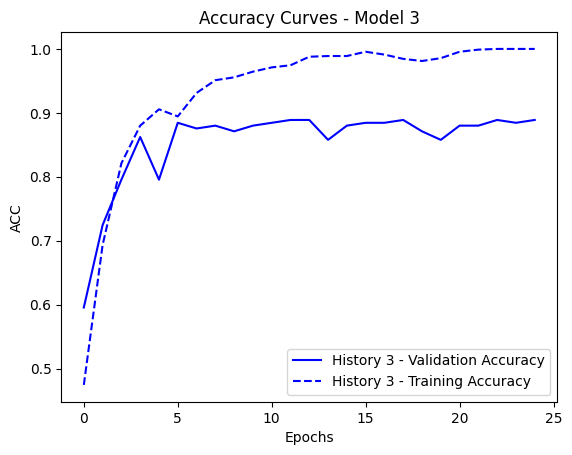

In [ ]:
plot_accuracy_curves_model(history_3, '3')

**CONCLUSIONS**:

Reducing the number of neurons in a given layer significantly reduced the accuracy of the model. The difference between validation and training loss is greater than for networks with a larger architecture (*model_1* and *model_2*).

PO POLSKU:

Zmniejszenie liczby neuronów w danej warstwie znacznie zmniejszyło dokładność modelu. Różnica między stratą walidacyjną i treningową jest większa niż w przypadku sieci o większej architekturze (*model_1* i *model_2*).

## model_4 - Kernel (4, 4)

OPISAĆ CO ZOSTAŁO ZROBIONE!!!!!!

A kernel of size 4x4 means that the convolutional layer will look at a local region of the input data that has a spatial extent of 4x4 pixels at a time. Smaller kernel sizes capture fine-grained details, while larger kernel sizes can capture more global patterns in the input data. However, the choice of kernel size also affects the number of learnable parameters in the model and, consequently, the model's complexity and training time.

PO POLSKU:

Jądro o rozmiarze 4x4 oznacza, że warstwa konwolucyjna będzie analizować lokalny region danych wejściowych o zasięgu przestrzennym 4x4 pikseli na raz. Mniejsze rozmiary jądra wychwytują drobne szczegóły, podczas gdy większe rozmiary jądra mogą uchwycić bardziej globalne wzorce w danych wejściowych. Jednak wybór rozmiaru jądra wpływa również na liczbę możliwych do nauczenia się parametrów w modelu, a w konsekwencji na złożoność modelu i czas uczenia.

In [ ]:
model_4 = Sequential()

model_4.add(layers.Rescaling(1./255))
model_4.add(layers.Conv2D(32,(4,4),
                        padding='same',
                        activation='relu',
                        input_shape=(img_width, img_height, 3)))
model_4.add(layers.MaxPool2D((2,2)))

model_4.add(layers.Conv2D(16,(4,4),
                        padding='same',
                        activation='relu'))
model_4.add(layers.MaxPool2D((2,2)))


model_4.add(layers.Flatten())

model_4.add(layers.Dense(64, activation='relu'))
model_4.add(layers.Dense(7, activation='softmax'))

In [ ]:
model_4.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics= ['accuracy'])

In [ ]:
history_4 = model_4.fit(train_ds,
                        validation_data = val_ds,
                        epochs = 25,
                        batch_size= 32)

Epoch 1/25
29/29 [==============================] - 30s 981ms/step - loss: 1.5381 - accuracy: 0.4744 - val_loss: 1.0110 - val_accuracy: 0.5911
Epoch 2/25
29/29 [==============================] - 28s 977ms/step - loss: 0.8043 - accuracy: 0.7244 - val_loss: 0.6707 - val_accuracy: 0.7867
Epoch 3/25
29/29 [==============================] - 29s 987ms/step - loss: 0.6265 - accuracy: 0.7667 - val_loss: 0.5735 - val_accuracy: 0.8000
Epoch 4/25
29/29 [==============================] - 29s 998ms/step - loss: 0.4498 - accuracy: 0.8500 - val_loss: 0.5813 - val_accuracy: 0.7956
Epoch 5/25
29/29 [==============================] - 28s 977ms/step - loss: 0.4311 - accuracy: 0.8478 - val_loss: 0.4388 - val_accuracy: 0.8578
Epoch 6/25
29/29 [==============================] - 29s 979ms/step - loss: 0.2736 - accuracy: 0.9078 - val_loss: 0.4143 - val_accuracy: 0.8844
Epoch 7/25
29/29 [==============================] - 29s 978ms/step - loss: 0.2259 - accuracy: 0.9256 - val_loss: 0.4013 - val_accuracy: 0.8756

In [ ]:
model_4.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 128, 128, 3)       0         
                                                                 
 conv2d_5 (Conv2D)           (None, 128, 128, 32)      1568      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 64, 64, 32)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 64, 64, 16)        8208      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 32, 32, 16)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 16384)            

In [ ]:
loss_4, accuracy_4 = model_4.evaluate(test_ds)
print('Test Accuracy:', accuracy_4)

9/9 [==============================] - 4s 385ms/step - loss: 0.3772 - accuracy: 0.8957
Test Accuracy: 0.8956834673881531


In [ ]:
save_model(model_4, model_path, 'model_4')

In [ ]:
saving_history(history_4, 'history_4')

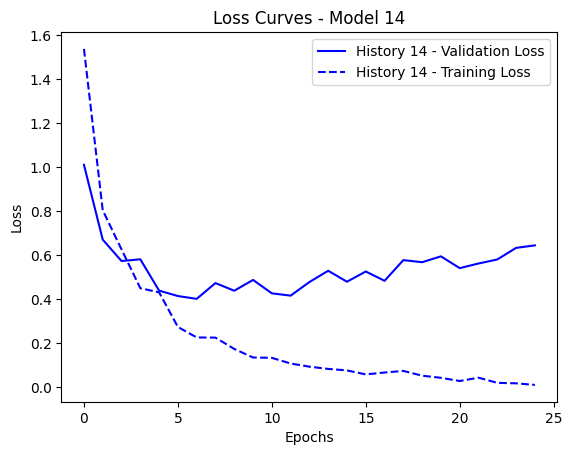

In [ ]:
plot_loss_curves_model(history_4, '4')

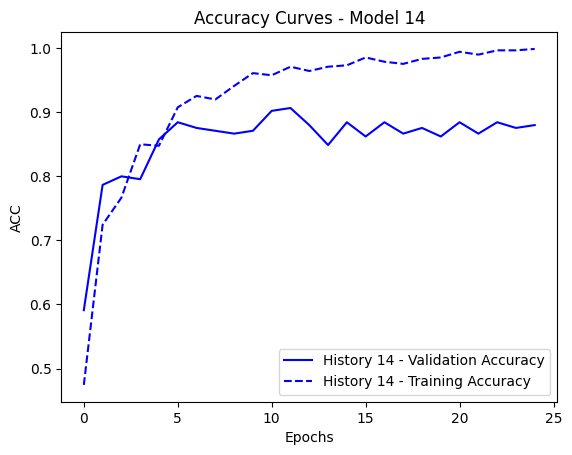

In [ ]:
plot_accuracy_curves_model(history_4, '4')

NAPISAĆ WNIOSEK Z WYKRESU !!!!!!!!!!!!!!

CONCLUSIONS:

Changing the kernel size from 3x3 to 4x4 and observing a deterioration in performance on the test set is not uncommon. The reason for this outcome can be attributed to several factors:

* **Receptive Field Size**: A 4x4 kernel has a larger receptive field compared to a
3x3 kernel. It means that the 4x4 kernel looks at a broader region of the input data during convolution. If the data contains more fine-grained details and local patterns, a larger kernel might miss or blur those important features, leading to degraded performance.

* **Model Complexity**: Increasing the kernel size from 3x3 to 4x4 increases the number of parameters in the model. This added complexity can lead to overfitting, especially if the training data is limited. Overfitting occurs when the model becomes too specific to the training data and fails to generalize well to unseen test data.

* Limited Data: If the size of the dataset is small, a larger kernel size can exacerbate the problem of overfitting. With limited data, it becomes more challenging for the model to learn meaningful patterns from the data, and a smaller kernel size may offer better generalization.

PO POLSKU:

Zmiana rozmiaru jądra z 3x3 na 4x4 i zaobserwowanie pogorszenia wydajności na zestawie testowym nie jest rzadkością. Przyczyną takiego wyniku może być kilka czynników:

* Rozmiar pola recepcyjnego: Jądro 4x4 ma większe pole receptywne w porównaniu do jądra 3x3.
jądra 3x3. Oznacza to, że jądro 4x4 patrzy na szerszy obszar danych wejściowych podczas splotu. Jeśli dane zawierają więcej drobnych szczegółów i lokalnych wzorców, większe jądro może pominąć lub rozmyć te ważne cechy, prowadząc do pogorszenia wydajności.

* Złożoność modelu: Zwiększenie rozmiaru jądra z 3x3 do 4x4 zwiększa liczbę parametrów w modelu. Ta dodatkowa złożoność może prowadzić do nadmiernego dopasowania, zwłaszcza jeśli dane treningowe są ograniczone. Overfitting występuje, gdy model staje się zbyt specyficzny dla danych treningowych i nie uogólnia się dobrze na niewidoczne dane testowe.

* Ograniczone dane: Jeśli rozmiar zbioru danych jest niewielki, większy rozmiar jądra może zaostrzyć problem nadmiernego dopasowania. Przy ograniczonej ilości danych, modelowi trudniej jest nauczyć się znaczących wzorców z danych, a mniejszy rozmiar jądra może zapewnić lepsze uogólnienie.

## model_5 - Drop out (0.5)

**Dropout** is a regularisation technique used in neural networks to help prevent model overlearning. When learning a neural network, dropout randomly disables (zeros out) some units (neurons) in the hidden layers during each training iteration.

The idea behind this is that during model learning, each unit is learned independently of the others. By turning off random units during training, the remaining units have to learn a better representation of the data, as they cannot rely on other units that have been turned off. Thus, the model becomes more flexible and generalises better to new data.

Dropout acts as a kind of regularisation because it forces the model to average the results with different combinations of units during prediction, which helps to reduce over-sensitivity to specific neuron connections. In this way, dropout can help reduce overlearning effects and improve the generalisability of the model on new data.

PO POLSKU:


**Dropout** jest techniką regularyzacji stosowaną w sieciach neuronowych, aby zapobiec nadmiernemu uczeniu się modelu. Podczas uczenia sieci neuronowej dropout losowo wyłącza (zeruje) niektóre jednostki (neurony) w warstwach ukrytych podczas każdej iteracji uczenia.

Chodzi o to, że podczas uczenia się modelu każda jednostka jest uczona niezależnie od innych. Wyłączając losowe jednostki podczas treningu, pozostałe jednostki muszą nauczyć się lepszej reprezentacji danych, ponieważ nie mogą polegać na innych jednostkach, które zostały wyłączone. W ten sposób model staje się bardziej elastyczny i lepiej uogólnia się na nowe dane.

Dropout działa jako rodzaj regularyzacji, ponieważ zmusza model do uśredniania wyników z różnymi kombinacjami jednostek podczas przewidywania, co pomaga zmniejszyć nadwrażliwość na określone połączenia neuronów. W ten sposób porzucenie może pomóc zmniejszyć efekty nadmiernego uczenia się i poprawić ogólność modelu na nowych danych.

In [ ]:
model_5 = Sequential()

model_5.add(layers.Rescaling(1./255))
model_5.add(layers.Conv2D(32,(3,3),
                        padding='valid',
                        activation='relu',
                        input_shape=(img_width, img_height, 3)))
model_5.add(layers.MaxPool2D((2,2)))
model_5.add(layers.Dropout(0.5))

model_5.add(layers.Conv2D(16,(3,3),
                        padding='valid',
                        activation='relu'))
model_5.add(layers.MaxPool2D((2,2)))
model_5.add(layers.Dropout(0.5))

model_5.add(layers.Flatten())

model_5.add(layers.Dense(64,
                         activation='relu'))


model_5.add(layers.Dense(7, activation='softmax'))

In [ ]:
model_5.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics= ['accuracy'])

In [ ]:
history_5 = model_5.fit(train_ds,
                        validation_data= val_ds,
                        epochs = 25,
                        batch_size= 32)

Epoch 1/25
29/29 [==============================] - 147s 5s/step - loss: 2.1714 - accuracy: 0.3922 - val_loss: 1.9373 - val_accuracy: 0.4222
Epoch 2/25
29/29 [==============================] - 23s 769ms/step - loss: 1.6308 - accuracy: 0.4267 - val_loss: 1.9374 - val_accuracy: 0.3689
Epoch 3/25
29/29 [==============================] - 22s 760ms/step - loss: 1.4554 - accuracy: 0.4622 - val_loss: 1.6731 - val_accuracy: 0.5511
Epoch 4/25
29/29 [==============================] - 22s 763ms/step - loss: 1.1692 - accuracy: 0.5800 - val_loss: 1.0278 - val_accuracy: 0.6800
Epoch 5/25
29/29 [==============================] - 23s 778ms/step - loss: 0.8908 - accuracy: 0.6811 - val_loss: 1.3356 - val_accuracy: 0.6622
Epoch 6/25
29/29 [==============================] - 23s 772ms/step - loss: 0.8131 - accuracy: 0.7011 - val_loss: 0.8220 - val_accuracy: 0.7600
Epoch 7/25
29/29 [==============================] - 23s 770ms/step - loss: 0.6475 - accuracy: 0.7600 - val_loss: 0.7815 - val_accuracy: 0.7600
E

In [ ]:
model_5.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 128, 128, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 63, 63, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 16)        4624      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 16)       0         
 2D)                                                    

In [ ]:
loss_5, accuracy_5 = model_5.evaluate(test_ds)
print('Test Accuracy:', accuracy_5)

9/9 [==============================] - 2s 172ms/step - loss: 0.4808 - accuracy: 0.8453
Test Accuracy: 0.8453237414360046


In [ ]:
save_model(model_5, model_path, 'model_5')

In [ ]:
saving_history(history_5, 'history_5')

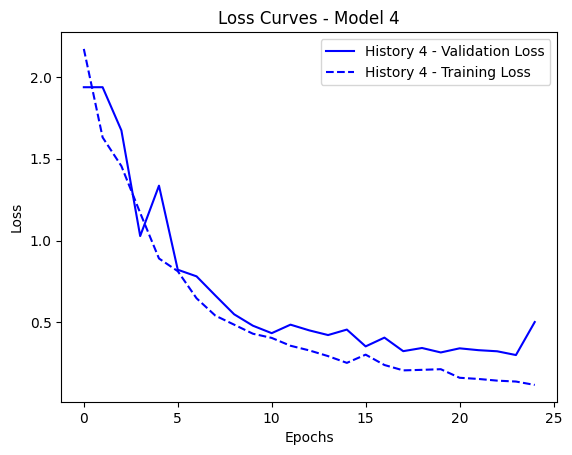

In [ ]:
plot_loss_curves_model(history_5, '5')

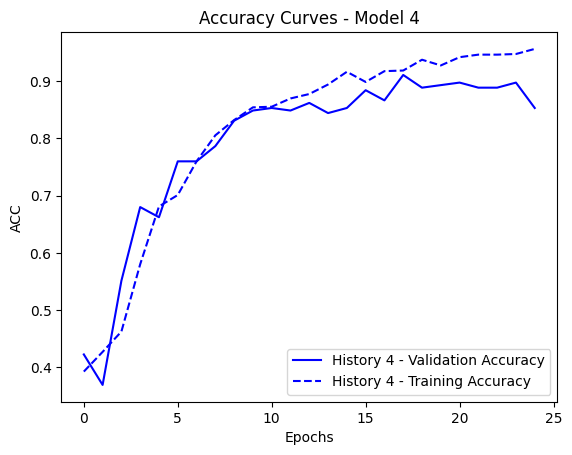

In [ ]:
plot_accuracy_curves_model(history_5, '5')

NAPISAĆ WNIOSEK Z WYKRESU !!!!!!!!!!!!!!

**CONCLUSIONS**:

As the curves move closer together we can see that the number of epochs can be increased. In the next model we will increase the number of epochs to get better results on the validation set and train the model more.

PO POLSKU:

Gdy krzywe zbliżają się do siebie, widzimy, że można zwiększyć liczbę epok. W następnym modelu zwiększymy liczbę epok, aby uzyskać lepsze wyniki na zestawie walidacyjnym i bardziej wytrenować model.

## model_6 - Dropout (0.5) -  50 epochos

OPISAĆ CO ZOSTAŁO ZROBIONE!!!!!!

Opisane w pkt. 4

In [ ]:
model_6 = Sequential()

model_6.add(layers.Rescaling(1./255))
model_6.add(layers.Conv2D(32,(3,3),
                        padding='valid',
                        activation='relu',
                        input_shape=(img_width, img_height, 3)))
model_6.add(layers.MaxPool2D((2,2)))
model_6.add(layers.Dropout(0.5))

model_6.add(layers.Conv2D(16,(3,3),
                        padding='valid',
                        activation='relu'))
model_6.add(layers.MaxPool2D((2,2)))
model_6.add(layers.Dropout(0.5))

model_6.add(layers.Flatten())

model_6.add(layers.Dense(64,
                         activation='relu'))

model_6.add(layers.Dense(7, activation='softmax'))

In [ ]:
model_6.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics= ['accuracy'])

In [ ]:
history_6 = model_6.fit(train_ds,
                        validation_data= val_ds,
                        epochs = 50,
                        batch_size= 32)

Epoch 1/50
29/29 [==============================] - 24s 761ms/step - loss: 1.7872 - accuracy: 0.3922 - val_loss: 1.9400 - val_accuracy: 0.3511
Epoch 2/50
29/29 [==============================] - 22s 744ms/step - loss: 1.4296 - accuracy: 0.4689 - val_loss: 1.3922 - val_accuracy: 0.5067
Epoch 3/50
29/29 [==============================] - 24s 780ms/step - loss: 1.0722 - accuracy: 0.5967 - val_loss: 1.0605 - val_accuracy: 0.7289
Epoch 4/50
29/29 [==============================] - 23s 772ms/step - loss: 0.8054 - accuracy: 0.7056 - val_loss: 0.7775 - val_accuracy: 0.7378
Epoch 5/50
29/29 [==============================] - 23s 758ms/step - loss: 0.6349 - accuracy: 0.7733 - val_loss: 0.7863 - val_accuracy: 0.7511
Epoch 6/50
29/29 [==============================] - 23s 766ms/step - loss: 0.5507 - accuracy: 0.8011 - val_loss: 0.7111 - val_accuracy: 0.7689
Epoch 7/50
29/29 [==============================] - 22s 757ms/step - loss: 0.4941 - accuracy: 0.8356 - val_loss: 0.5722 - val_accuracy: 0.8044

In [ ]:
model_6.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 128, 128, 3)       0         
                                                                 
 conv2d_2 (Conv2D)           (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 63, 63, 32)       0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 63, 63, 32)        0         
                                                                 
 conv2d_3 (Conv2D)           (None, 61, 61, 16)        4624      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 30, 30, 16)       0         
 2D)                                                  

In [ ]:
loss_6, accuracy_6 = model_6.evaluate(test_ds)
print('Test Accuracy:', accuracy_6)

9/9 [==============================] - 2s 153ms/step - loss: 0.3826 - accuracy: 0.8957
Test Accuracy: 0.8956834673881531


In [ ]:
save_model(model_6, model_path, 'model_6')

In [ ]:
saving_history(history_6, 'history_6')

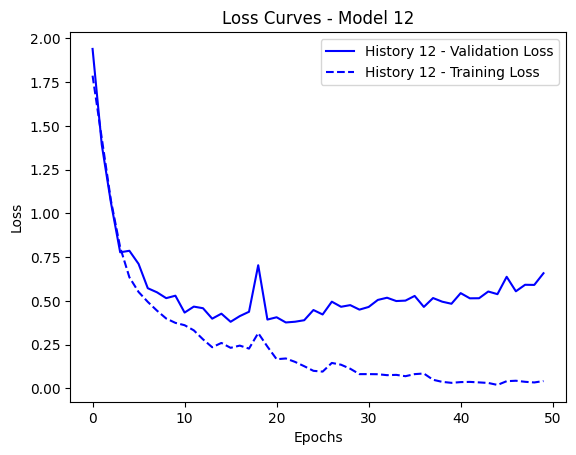

In [ ]:
plot_loss_curves_model(history_6, '6')

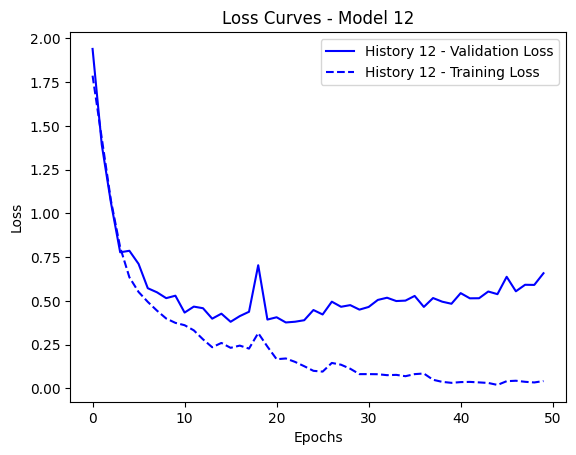

In [ ]:
plot_loss_curves_model(history_6, 6)

NAPISAĆ WNIOSEK Z WYKRESU !!!!!!!!!!!!!!

**CONCLUSIONS**:

Increasing the epochs did not improve the result. Increasing the number of epochs increases overfitting.

PO POLSKU:

Zwiększenie liczby epok nie poprawiło wyników. Zwiększenie liczby epok zwiększa nadmierne dopasowanie.

## model_7 - Regularisation (0.01)

In [ ]:
# dodać opis co to reguryzacja i ktorki opis zastosowania i dlaczego

**Regularisation** in the context of machine learning refers to techniques used to prevent model overfitting. Overfitting occurs when a model is over-fitted to training data and does not generalise well to new data.

There are many regularisation methods that can be used to control overfitting and improve the generalisation ability of the model. Here are some popular regularisation techniques:

L1 and L2 regularisation (L1 and L2 regularisation): These techniques add a penalty to the cost function for large values of the model weights. L1 regularisation promotes sparse weights, eliminating irrelevant features, while L2 regularisation encourages smaller but non-zero weights. Both methods help to reduce excessive model complexity.

Regularisation is an important tool in the fight against overfitting and helps to create more generic and useful models. Depending on the specific problem and type of data, different regularisation techniques can be used to obtain optimal results.

PO POLSKU:

**Regularyzacja** w kontekście uczenia maszynowego odnosi się do technik stosowanych w celu zapobiegania nadmiernemu dopasowaniu modelu. Overfitting występuje, gdy model jest nadmiernie dopasowany do danych treningowych i nie uogólnia się dobrze na nowe dane.

Istnieje wiele metod regularyzacji, które można wykorzystać do kontrolowania nadmiernego dopasowania i poprawy zdolności uogólniania modelu. Oto kilka popularnych technik regularyzacji:

Regularyzacja L1 i L2 (regularyzacja L1 i L2): Techniki te dodają karę do funkcji kosztu dla dużych wartości wag modelu. Regularyzacja L1 promuje rzadkie wagi, eliminując nieistotne cechy, podczas gdy regularyzacja L2 zachęca do mniejszych, ale niezerowych wag. Obie metody pomagają zmniejszyć nadmierną złożoność modelu.

Regularyzacja jest ważnym narzędziem w walce z nadmiernym dopasowaniem i pomaga tworzyć bardziej ogólne i użyteczne modele. W zależności od konkretnego problemu i rodzaju danych, różne techniki regularyzacji mogą być stosowane w celu uzyskania optymalnych wyników.

In [ ]:
model_7 = Sequential()

model_7.add(layers.Rescaling(1./255))


model_7.add(layers.Conv2D(32,(3,3),
                        padding='valid',
                        activation='relu',
                        kernel_regularizer=keras.regularizers.l2(0.01),
                        input_shape=(img_width, img_height, 3)))

model_7.add(layers.MaxPool2D((2,2)))

model_7.add(layers.Conv2D(16,(3,3),
                        padding='valid',
                        activation='relu',
                        kernel_regularizer=keras.regularizers.l2(0.01)))
model_7.add(layers.MaxPool2D((2,2)))


model_7.add(layers.Flatten())

model_7.add(layers.Dense(64,
                         kernel_regularizer=keras.regularizers.l2(0.01),
                         activation='relu'))

model_7.add(layers.Dense(7, activation='softmax'))

In [ ]:
model_7.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics= ['accuracy'])

In [ ]:
history_7 = model_7.fit(train_ds,
                        validation_data= val_ds,
                        epochs = 25,
                        batch_size= 32)

Epoch 1/25
29/29 [==============================] - 12s 361ms/step - loss: 2.3013 - accuracy: 0.4356 - val_loss: 1.6138 - val_accuracy: 0.6133
Epoch 2/25
29/29 [==============================] - 12s 390ms/step - loss: 1.3332 - accuracy: 0.7022 - val_loss: 1.1331 - val_accuracy: 0.8044
Epoch 3/25
29/29 [==============================] - 12s 397ms/step - loss: 0.9851 - accuracy: 0.8244 - val_loss: 0.9699 - val_accuracy: 0.8044
Epoch 4/25
29/29 [==============================] - 12s 393ms/step - loss: 0.8392 - accuracy: 0.8567 - val_loss: 0.8542 - val_accuracy: 0.8444
Epoch 5/25
29/29 [==============================] - 11s 369ms/step - loss: 0.7250 - accuracy: 0.9078 - val_loss: 0.8023 - val_accuracy: 0.8533
Epoch 6/25
29/29 [==============================] - 12s 398ms/step - loss: 0.6740 - accuracy: 0.9078 - val_loss: 0.8511 - val_accuracy: 0.8133
Epoch 7/25
29/29 [==============================] - 12s 399ms/step - loss: 0.6388 - accuracy: 0.9111 - val_loss: 0.7784 - val_accuracy: 0.8178

In [ ]:
model_7.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_4 (Rescaling)     (None, 128, 128, 3)       0         
                                                                 
 conv2d_8 (Conv2D)           (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 63, 63, 32)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 61, 61, 16)        4624      
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 30, 30, 16)       0         
 2D)                                                             
                                                                 
 flatten_4 (Flatten)         (None, 14400)            

In [ ]:
loss_7, accuracy_7 = model_7.evaluate(test_ds)
print('Test Accuracy:', accuracy_7)

9/9 [==============================] - 2s 153ms/step - loss: 0.6462 - accuracy: 0.8597
Test Accuracy: 0.8597122430801392


In [ ]:
save_model(model_7, model_path, 'model_7')

In [ ]:
saving_history(history_7, 'history_7')

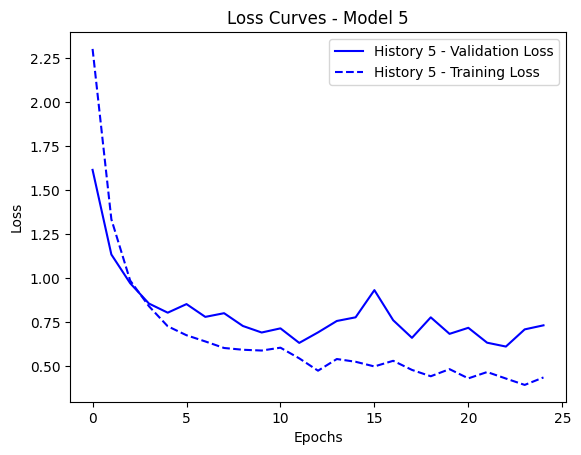

In [ ]:
plot_loss_curves_model(history_7, '7')

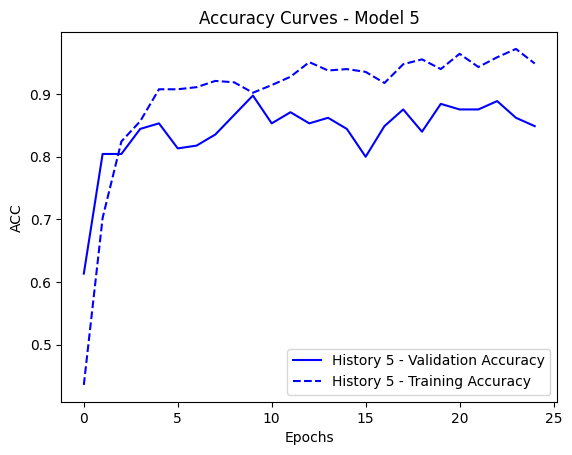

In [ ]:
plot_accuracy_curves_model(history_7, '7')

NAPISAĆ WNIOSEK Z WYKRESU !!!!!!!!!!!!!!

**CONCLUSIONS**:

In the example given, adding regularisation does not improve the results for learning rate = 0.01. We should look for a learning rate that improves the results on the validation set.

PO POLSKU:

W podanym przykładzie dodanie regularyzacji nie poprawia wyników dla współczynnika uczenia = 0,01. Powinniśmy poszukać współczynnika uczenia, który poprawi wyniki na zestawie walidacyjnym.

## Transfer Learning

Transfer learning is a technique in deep learning that involves using pre-trained models as a starting point for a new task or problem. Instead of building a neural network from scratch and training it on a large dataset, transfer learning allows us to leverage the knowledge gained from training a model on a related task or a large dataset.

The general idea behind transfer learning is that features learned by a model on one task can be useful for another task, especially when the datasets for the two tasks share some similarities. By using pre-trained models, we can significantly reduce the amount of data and time required for training, and often achieve better performance on the new task.

The key benefits of transfer learning include:
* Reduced training time and data requirements since you start with pre-trained weights.
* Improved generalization on the new task, especially when the new dataset is
small or similar to the original dataset.





PO POLSKU:

Transfer learning to technika uczenia głębokiego, która polega na wykorzystaniu wstępnie wytrenowanych modeli jako punktu wyjścia dla nowego zadania lub problemu. Zamiast budować sieć neuronową od podstaw i trenować ją na dużym zbiorze danych, uczenie transferowe pozwala nam wykorzystać wiedzę zdobytą podczas trenowania modelu na powiązanym zadaniu lub dużym zbiorze danych.

Ogólna idea uczenia transferowego polega na tym, że cechy wyuczone przez model w jednym zadaniu mogą być przydatne w innym zadaniu, zwłaszcza gdy zbiory danych dla tych dwóch zadań mają pewne podobieństwa. Korzystając ze wstępnie wytrenowanych modeli, możemy znacznie zmniejszyć ilość danych i czas potrzebny na szkolenie, a często osiągnąć lepszą wydajność w nowym zadaniu.

Kluczowe zalety uczenia transferowego obejmują:
* Skrócenie czasu szkolenia i wymagań dotyczących danych, ponieważ zaczynasz od wstępnie wytrenowanych wag.
* Lepsze uogólnienie w nowym zadaniu, zwłaszcza gdy nowy zbiór danych jest mały lub podobny do oryginalnego.
mały lub podobny do oryginalnego zbioru danych.

### model_8 Transfer Learning (epochs = 10)

In [ ]:
efficient_model = EfficientNetB0(include_top = False,
                                 weights = 'imagenet',
                                 input_shape = (img_height, img_width,  3))

16705208/16705208 [==============================] - 0s 0us/step


In [ ]:
model_8 = Sequential()

model_8.add(efficient_model)
model_8.add(layers.Flatten())

model_8.add(layers.Dense(64, activation='relu'))
model_8.add(layers.Dense(7, activation='softmax'))

In [ ]:
model_8.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics = ['accuracy'])

In [ ]:
model_8.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb0 (Functional)  (None, 4, 4, 1280)       4049571   
                                                                 
 flatten_1 (Flatten)         (None, 20480)             0         
                                                                 
 dense_3 (Dense)             (None, 64)                1310784   
                                                                 
 dense_4 (Dense)             (None, 7)                 455       
                                                                 
Total params: 5,360,810
Trainable params: 5,318,787
Non-trainable params: 42,023
_________________________________________________________________


In [ ]:
history_8 = model_8.fit(train_ds,
                        validation_data = val_ds,
                        epochs = 10,
                        batch_size = 32)

Epoch 1/10
29/29 [==============================] - 131s 4s/step - loss: 0.6727 - accuracy: 0.7811 - val_loss: 0.2969 - val_accuracy: 0.9111
Epoch 2/10
29/29 [==============================] - 96s 3s/step - loss: 0.2600 - accuracy: 0.9156 - val_loss: 0.2893 - val_accuracy: 0.9289
Epoch 3/10
29/29 [==============================] - 93s 3s/step - loss: 0.1674 - accuracy: 0.9511 - val_loss: 0.3577 - val_accuracy: 0.9067
Epoch 4/10
29/29 [==============================] - 100s 3s/step - loss: 0.1113 - accuracy: 0.9567 - val_loss: 0.4948 - val_accuracy: 0.8533
Epoch 5/10
29/29 [==============================] - 93s 3s/step - loss: 0.1873 - accuracy: 0.9522 - val_loss: 0.5582 - val_accuracy: 0.8978
Epoch 6/10
29/29 [==============================] - 95s 3s/step - loss: 0.1817 - accuracy: 0.9600 - val_loss: 1.1861 - val_accuracy: 0.8667
Epoch 7/10
29/29 [==============================] - 100s 3s/step - loss: 0.2863 - accuracy: 0.9367 - val_loss: 1.8670 - val_accuracy: 0.8311
Epoch 8/10
29/29 

In [ ]:
loss_8, accuracy_8 = model_8.evaluate(test_ds)
print('Test Accuracy:', accuracy_8)

9/9 [==============================] - 6s 636ms/step - loss: 0.3442 - accuracy: 0.9460
Test Accuracy: 0.9460431933403015


In [ ]:
# nie działa zapisywanie na tym modelu wersja tesorflow nie taka

In [ ]:
save_model(model_8, model_path, 'model_8')

In [ ]:
saving_history(history_8, 'history_8')

In [ ]:
(history_8, 8)

(<keras.callbacks.History at 0x7ce2750b1b70>, 17)

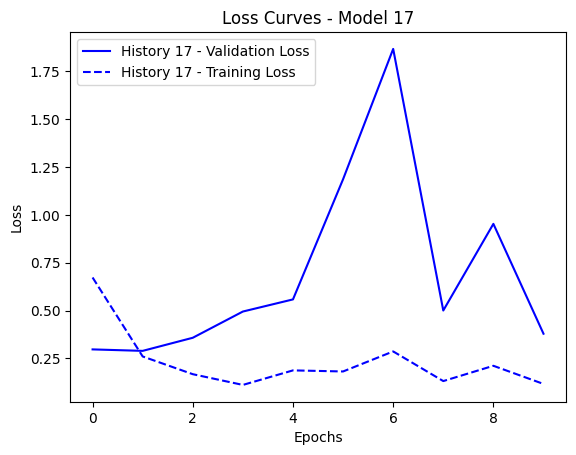

In [ ]:
plot_loss_curves_model(history_8, '8')

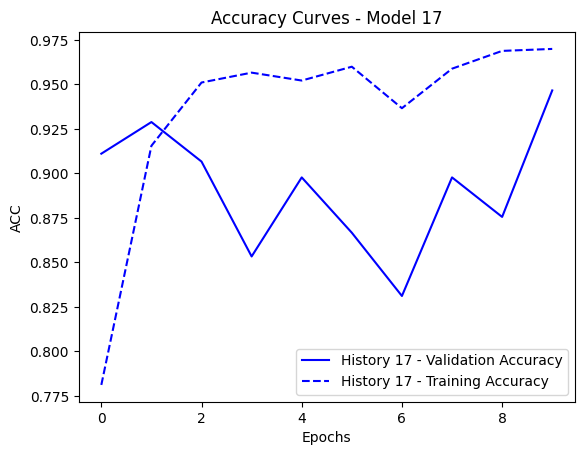

In [ ]:
plot_accuracy_curves_model(history_8, '8')

**CONCLUSIONS**:

The approaching curves show a positive learning curve, so the number of epochs can be increased to give the model a chance to train. In the next model the number of epochs will be increased to get better results on the validation set.

PO POLSKU:

Krzywe zbliżają się do siebie wykazuje pozytywny postęp w uczeniu się, w związku z tym można zwiększyć liczbę epok, aby była możliwość wytrenowania modelu. W następnym modelu zostanie zwiększona liczba epok, aby uzyskać lepsze wyniki na zestawie walidacyjnym.


Na podstawie przedstawionych wyników można wyciągnąć kilka wniosków dotyczących treningu modelu sieci neuronowej:

Efekt uczenia się: Model zdaje się uczyć się z czasem, ponieważ wartość funkcji kosztu (loss) maleje w miarę postępów treningu zarówno dla danych treningowych, jak i walidacyjnych. To pozytywny sygnał, sugerujący, że model dostosowuje się do dostępnych danych.

Dokładność: Dokładność modelu również wzrasta w miarę treningu na danych treningowych i walidacyjnych. To oznacza, że model rozwija zdolność do poprawnego klasyfikowania obrazów zarówno ze zbioru treningowego, jak i walidacyjnego.

Overfitting: W niektórych przypadkach (np. epoka 4 i 6) można zaobserwować pewne rozbieżności między dokładnością treningową a walidacyjną, co może sugerować pewien stopień przeuczenia (overfitting). Warto zwrócić uwagę na to, czy różnice te rosną znacząco wraz z kolejnymi epokami, co może wskazywać na konieczność regularyzacji.

Zmienne wyniki: Warto zauważyć, że w niektórych epokach zmiany w funkcji kosztu i dokładności są dość duże. To może wskazywać na pewne wahania w trakcie uczenia. Stosowanie regularyzacji, takiej jak Dropout lub Batch Normalization, może pomóc w stabilizacji procesu treningu.

Optymalizacja: Warto zwrócić uwagę na optymalizację modelu. Czas trwania poszczególnych epok może być dość różny, co może wskazywać na możliwość dostosowania hiperparametrów optymalizatora.

Najlepsze osiągnięcie: Warto zwrócić uwagę na wynik w ostatniej epoce. Dokładność na danych walidacyjnych wynosząca 94.67% jest bardzo obiecująca, sugerując, że model osiągnął wysoką zdolność do generalizacji na nieznane dane.

Zastosowanie regularyzacji: Skoki w funkcji kosztu i dokładności mogą być związane z brakiem pewnych technik regularyzacji. Dodanie regularyzacji może pomóc w łagodzeniu tych zmian i poprawie ogólnej stabilności procesu treningu.

Dalsza analiza: Warto zbadać, czy wyniki uzyskane w różnych epokach mogą być poprawione poprzez tuning hiperparametrów (np. współczynnika uczenia, regularyzacji) lub eksperymentowanie z innymi architekturami sieci neuronowej.

Podsumowując, model zdaje się wykazywać pozytywny postęp w uczeniu się, ale może wymagać pewnych korekt w celu poprawy stabilności i uniknięcia przeuczenia. Dalsza analiza oraz eksperymenty z regularyzacją i hiperparametrami mogą pomóc poprawić wyniki.

### model_9 Transfer Learning (epochs = 25)




In [ ]:
efficient_model = EfficientNetB0(include_top = False,
                                 weights = 'imagenet',
                                 input_shape = (img_height, img_width,  3))

In [ ]:
model_9 = Sequential()

model_9.add(efficient_model)
model_9.add(layers.Flatten())

model_9.add(layers.Dense(128, activation='relu'))
model_9.add(layers.Dense(7, activation='softmax'))

In [ ]:
model_9.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics = ['accuracy'])

In [ ]:
history_18 = model_18.fit(train_ds,
                          validation_data = val_ds,
                          epochs = 25,
                          batch_size = 16)

Epoch 1/25
29/29 [==============================] - 131s 4s/step - loss: 0.7299 - accuracy: 0.7967 - val_loss: 0.4686 - val_accuracy: 0.8311
Epoch 2/25
29/29 [==============================] - 96s 3s/step - loss: 0.3056 - accuracy: 0.9311 - val_loss: 0.6434 - val_accuracy: 0.8089
Epoch 3/25
29/29 [==============================] - 93s 3s/step - loss: 0.2552 - accuracy: 0.9200 - val_loss: 0.7037 - val_accuracy: 0.9156
Epoch 4/25
29/29 [==============================] - 96s 3s/step - loss: 0.1927 - accuracy: 0.9411 - val_loss: 0.9518 - val_accuracy: 0.8000
Epoch 5/25
29/29 [==============================] - 95s 3s/step - loss: 0.1850 - accuracy: 0.9467 - val_loss: 0.6074 - val_accuracy: 0.9244
Epoch 6/25
29/29 [==============================] - 93s 3s/step - loss: 0.2153 - accuracy: 0.9389 - val_loss: 0.3782 - val_accuracy: 0.9022
Epoch 7/25
29/29 [==============================] - 100s 3s/step - loss: 0.1202 - accuracy: 0.9600 - val_loss: 0.3838 - val_accuracy: 0.9333
Epoch 8/25
29/29 [

In [ ]:
model_9.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb0 (Functional)  (None, 4, 4, 1280)       4049571   
                                                                 
 flatten_2 (Flatten)         (None, 20480)             0         
                                                                 
 dense_5 (Dense)             (None, 128)               2621568   
                                                                 
 dense_6 (Dense)             (None, 7)                 903       
                                                                 
Total params: 6,672,042
Trainable params: 6,630,019
Non-trainable params: 42,023
_________________________________________________________________


In [ ]:
loss_9, accuracy_9 = model_9.evaluate(test_ds)
print('Test Accuracy:', accuracy_9)

9/9 [==============================] - 8s 812ms/step - loss: 0.4311 - accuracy: 0.9245
Test Accuracy: 0.9244604110717773


In [ ]:
# nie działa

In [ ]:
save_model(model_9, model_path, 'model_9')

In [ ]:
saving_history(history_9, 'history_9')

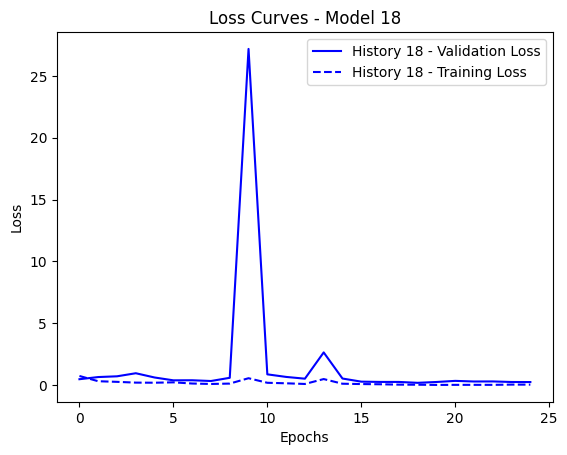

In [ ]:
plot_loss_curves_model(history_9, '9')

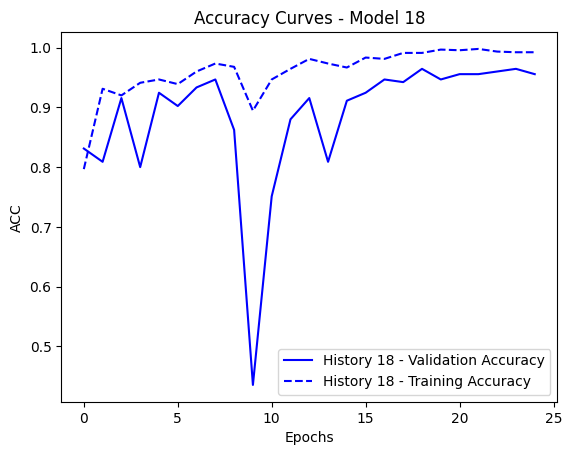

In [ ]:
plot_accuracy_curves_model(history_9, '9')

**CONCLUSIONS**:

The model achieved high accuracy on both the validation and train sets.
The model is not overtrained and has a good and high accuracy on the test set.

PO POLSKU: DO SPRAWDZENIA I POPRAWIENIA:

W epokach 17 i 19 następuje znaczący spadek dokładności walidacji do wartości około 48%. Jest to bardzo niska dokładność w porównaniu do wcześniejszych epok. Spadek ten sugeruje, że model w tych epokach nie radzi sobie dobrze z klasyfikacją na zbiorze walidacyjnym.

W epoce 10 i 11 również występuje znaczny spadek dokładności walidacji do około 74-75%. Jest to także niska wartość, co może wskazywać na problemy z wydajnością modelu na danych walidacyjnych.

Spadek dokładności na zbiorze walidacyjnym wskazuje, że model może doświadczać przeuczenia. Model staje się bardzo dopasowany do danych treningowych, ale traci zdolność do ogólnego rozpoznawania wzorców.

Aby przeciwdziałać przeuczeniu i poprawić ogólną wydajność modelu, warto zastosować techniki regularyzacji, jak np. dropout lub L2 regularyzacja, które pomagają ograniczyć overfitting. Można również rozważyć zwiększenie rozmiaru zestawu danych treningowych lub zastosowanie technik augmentacji danych, aby zapewnić modelowi bardziej zróżnicowane przykłady treningowe.


Na podstawie przedstawionych wyników można wyciągnąć następujące wnioski dotyczące treningu modelu:

Postęp uczenia się: W początkowych epokach można zauważyć znaczny spadek funkcji straty (loss) i wzrost dokładności na danych treningowych, co sugeruje, że model szybko się uczy i dostosowuje do treningowych danych wejściowych.

Wrażliwość modelu: W niektórych epokach (np. epoka 3, 5) model może reagować wrażliwie na zmiany, co prowadzi do gwałtownego spadku dokładności na danych walidacyjnych. To może sugerować, że pewne hiperparametry wymagają optymalizacji lub że model jest wrażliwy na pewne cechy danych.

Przeuczenie: W niektórych epokach (np. epoka 10, 14) można zaobserwować przeuczenie modelu, ponieważ dokładność na danych treningowych jest wyższa niż na danych walidacyjnych. Warto podjąć środki regularyzacji, takie jak Dropout lub L2 regularyzacja, aby ograniczyć przeuczenie.

Dokładność: W miarę treningu dokładność na danych walidacyjnych osiąga wysokie wartości, osiągając nawet 96-97%. To sugeruje, że model ma zdolność do generalizacji i dobrze radzi sobie z nieznaniem danych.

Wpływ partii: Zmiana wielkości partii (batch size) może mieć wpływ na stabilność i szybkość uczenia się. Warto zwrócić uwagę, że większe partie mogą prowadzić do większego przyspieszenia treningu, ale mogą również wprowadzać pewną niestabilność.

Ostatnie epoki: W ostatnich epokach wartości funkcji straty (loss) i dokładności są stosunkowo stabilne, co sugeruje, że model osiągnął pewien poziom konwergencji i dalsze treningi mogą nie przynosić znaczących zmian.

Optymalizacja: Warto zwrócić uwagę na optymalizację hiperparametrów modelu, takich jak współczynnik uczenia się, funkcja aktywacji, regularyzacja, aby uzyskać jeszcze lepsze wyniki.

Zastosowanie regularyzacji: W przypadkach, gdy występuje przeuczenie, stosowanie technik regularyzacji, takich jak Dropout, może pomóc poprawić zdolność generalizacji modelu.

Wpływ eksperymentów: Eksperymentowanie z różnymi hiperparametrami i technikami może pomóc w zrozumieniu, jak model zachowuje się w odpowiedzi na różne ustawienia.

Podsumowując, model wydaje się rozwijać zdolności do poprawnego klasyfikowania, ale może wymagać pewnych poprawek, takich jak regularyzacja i optymalizacja hiperparametrów, aby osiągnąć jeszcze lepsze wyniki.

# Confusion Matrix

The **confusion matrix** is a tool used in the field of machine learning and statistics to evaluate the performance of a classification model. It presents a tabulation of the model's predictions against the true labels (classes) of the test data. It is particularly useful when classification models have more than one class (binary or multiclass).

The confusion matrix consists of four main elements:

- **True Positives (TP)**: The number of samples correctly classified as a particular class. This means the model correctly predicted those samples as positive.

- **True Negatives (TN)**: The number of samples correctly classified as negatives for a particular class. The model correctly predicted that these samples do not belong to the given class.

- **False Positives (FP)**: The number of samples incorrectly classified as positives for a particular class. The model wrongly assigned these samples to the given class when they should be negative.

- **False Negatives (FN)**: The number of samples incorrectly classified as negatives for a particular class. The model mistakenly predicted that these samples do not belong to the given class when they should be positive.

Based on these four values, various performance metrics for the classification model can be calculated, such as:

- **Accuracy**: *(TP + TN) / (TP + TN + FP + FN)* - the proportion of correctly classified samples, both positive and negative, relative to all samples in the test set. It is a general measure of classification model performance.

- **Precision**: *TP / (TP + FP)* - the proportion of correctly predicted positive samples among all samples predicted as positive.

- **Recall**: *TP / (TP + FN)* - the proportion of correctly predicted positive samples among all truly positive samples.

- **F1-score**: *2 * (Precision * Recall) / (Precision + Recall)* - the harmonic mean of precision and recall, useful when balancing precision and recall is important.

The confusion matrix allows for a better understanding of the classification model's behavior, especially with regard to different classes and the errors it makes. It is a valuable tool for assessing the performance of the model before deploying it in real-world applications.

PO POLSKU:

Macierz pomyłek to narzędzie używane w dziedzinie uczenia maszynowego i statystyki do oceny wydajności modelu klasyfikacyjnego. Prezentuje zestawienie przewidywań modelu wobec prawdziwych etykiet (klas) danych testowych. Jest szczególnie przydatna, gdy modele klasyfikacji mają więcej niż jedną klasę (binarną lub wieloklasową).

Macierz pomyłek składa się z czterech głównych elementów:

Prawdziwie Pozytywne (TP): Liczba próbek poprawnie sklasyfikowanych jako określona klasa. Oznacza to, że model poprawnie przewidział te próbki jako pozytywne.

Prawdziwie Negatywne (TN): Liczba próbek poprawnie sklasyfikowanych jako negatywne dla określonej klasy. Model poprawnie przewidział, że te próbki nie należą do danej klasy.

Fałszywie Pozytywne (FP): Liczba próbek niewłaściwie sklasyfikowanych jako pozytywne dla określonej klasy. Model błędnie przypisał te próbki do danej klasy, kiedy powinny być negatywne.

Fałszywie Negatywne (FN): Liczba próbek niewłaściwie sklasyfikowanych jako negatywne dla określonej klasy. Model błędnie przewidział, że te próbki nie należą do danej klasy, kiedy powinny być pozytywne.

Na podstawie tych czterech wartości można obliczyć różne miary wydajności modelu klasyfikacji, takie jak:

Dokładność: (TP + TN) / (TP + TN + FP + FN) - proporcja prawidłowo sklasyfikowanych próbek, zarówno pozytywnych, jak i negatywnych, względem wszystkich próbek w zbiorze testowym. To ogólna miara wydajności modelu klasyfikacyjnego.

Precyzja: TP / (TP + FP) - proporcja poprawnie przewidzianych próbek pozytywnych spośród wszystkich próbek przewidzianych jako pozytywne.

Czułość: TP / (TP + FN) - proporcja poprawnie przewidzianych próbek pozytywnych spośród wszystkich faktycznie pozytywnych próbek.

F1-score: 2 * (Precyzja * Czułość) / (Precyzja + Czułość) - średnia harmoniczna precyzji i czułości, użyteczna, gdy ważne jest zrównoważenie precyzji i czułości.

Macierz pomyłek pozwala na lepsze zrozumienie zachowania modelu klasyfikacyjnego, zwłaszcza w odniesieniu do różnych klas i błędów, które popełnia. To cenne narzędzie do oceny wydajności modelu przed jego wdrożeniem w aplikacjach rzeczywistych.

In [ ]:
# nie klikać

Calculation of values for the confusion matrix for the best model.

PO POLSKU:

Wyliczenie wartości do confusion matrix dla najlepszego modelu

In [ ]:
predictions = np.array([])
labels =  np.array([])
for x, y in test_ds:
  predictions = np.concatenate([predictions, np.argmax(model_18.predict(x), axis = -1)])
  labels = np.concatenate([labels, np.argmax(y.numpy(), axis=-1)])

result = confusion_matrix(labels, predictions , normalize='pred')

1/1 [==============================] - 1s 638ms/step


In [ ]:
#nieklikać

Display of confusion matrix for the best model.

PO POLSKU:

Wyświetlenie confusion matrix dla najlepszego modelu

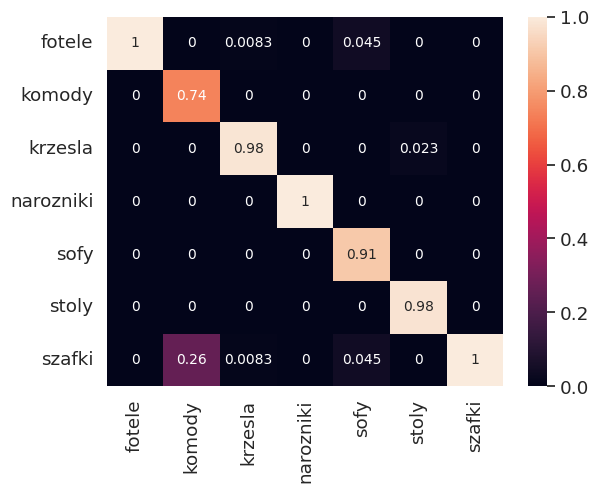

In [ ]:
df_cm = pd.DataFrame(result, train_ds.class_names, train_ds.class_names)

sn.set(font_scale=1.2)
sn.heatmap(df_cm, annot=True, annot_kws={'size': 10})

plt.title('Normalized Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

plt.show()

The model scores very well for armchairs, chairs, corners, tables and
cupboards. The model confuses chests of drawers with wardrobes. This is mainly due to the similarity of these objects. The difference between these objects is so small that a human would have a problem classifying a cupboard or a chest of drawers correctly.

PO POLSKU:

Model ten bardzo dobrze sprawdza się w przypadku foteli, krzeseł, narożników, stołów i
szafek. Model myli komody z szafami. Wynika to głównie z podobieństwa tych obiektów. Granica między tymi obiektami jest tak mała, że osoba miałaby problem z prawidłowym zaklasyfikowaniem szafy lub komody.

# Comparison of prediction results (pokazanie wynikow predykcji)


ZMIENIĆ PONIŻEJ NAZWY MODELI !!!!!!!

In [ ]:
def create_table():
    data = {
            'model': ['Basic model', 'Increased number of neurons','Reduced number of neurons', 'Kernel size (4, 4)', 'Dropout (0.5)',
                      'Dropout (0.5)', 'Regularisation (0.01)', 'Transfer Learning (epochs = 10)', 'Transfer Learning (epochs = 25)'],
            'Loss': [loss_1, loss_2, loss_3, loss_4, loss_5, loss_6, loss_7, loss_8, loss_9],
            'Accuracy': [accuracy_1, accuracy_2, accuracy_3, accuracy_4, accuracy_5,accuracy_6 ,accuracy_7, accuracy_8, accuracy_9]
    }

    df = pd.DataFrame(data)
    return df

data_table = create_table()
print(data_table)

                                                model      Loss  Accuracy
0                                         Basic model  0.327336  0.917266
1                         Increased number of neurons  0.432460  0.910072
2                           Reduced number of neurons  0.601212  0.845324
3                                       Dropout (0.5)  0.357295  0.877698
4                               Regularisation (0.01)  0.646162  0.859712
5   Batch Normalization + increase in the number o...  0.367245  0.917266
6                                 Regularisation 0.07  0.515106  0.895683
7   Regularisation + Additional Convolutional Laye...  0.629905  0.892086
8                    Other regularisation values 0.05  0.596153  0.910072
9                           Other regularisation 0.03  0.525618  0.917266
10                    Other regularisation values 0.1  0.553531  0.902878
11                                      Dropout (0.2)  0.387573  0.920863
12                                 Ker

In [ ]:
# zosatwilbym 0 1 2
#

## Checking performance on Test Data

Test the model on test data.

Verify that the learned model correctly assigns images to the correct furniture class.

The following code randomly displays 16 images from the test set and assigns them to a class based on the learned model.

PO POLSKU:

Przetestuj model na danych testowych.

Sprawdź, czy wyuczony model prawidłowo przypisuje obrazy do odpowiedniej klasy mebli.

Poniższy kod losowo wyświetla 16 obrazów z zestawu testowego i przypisuje je do klasy na podstawie wyuczonego modelu.

1/1 [==============================] - 2s 2s/step

Number of predicted labels: 144
total_match: 136
Prediction accuracy: 94.44444444444444%



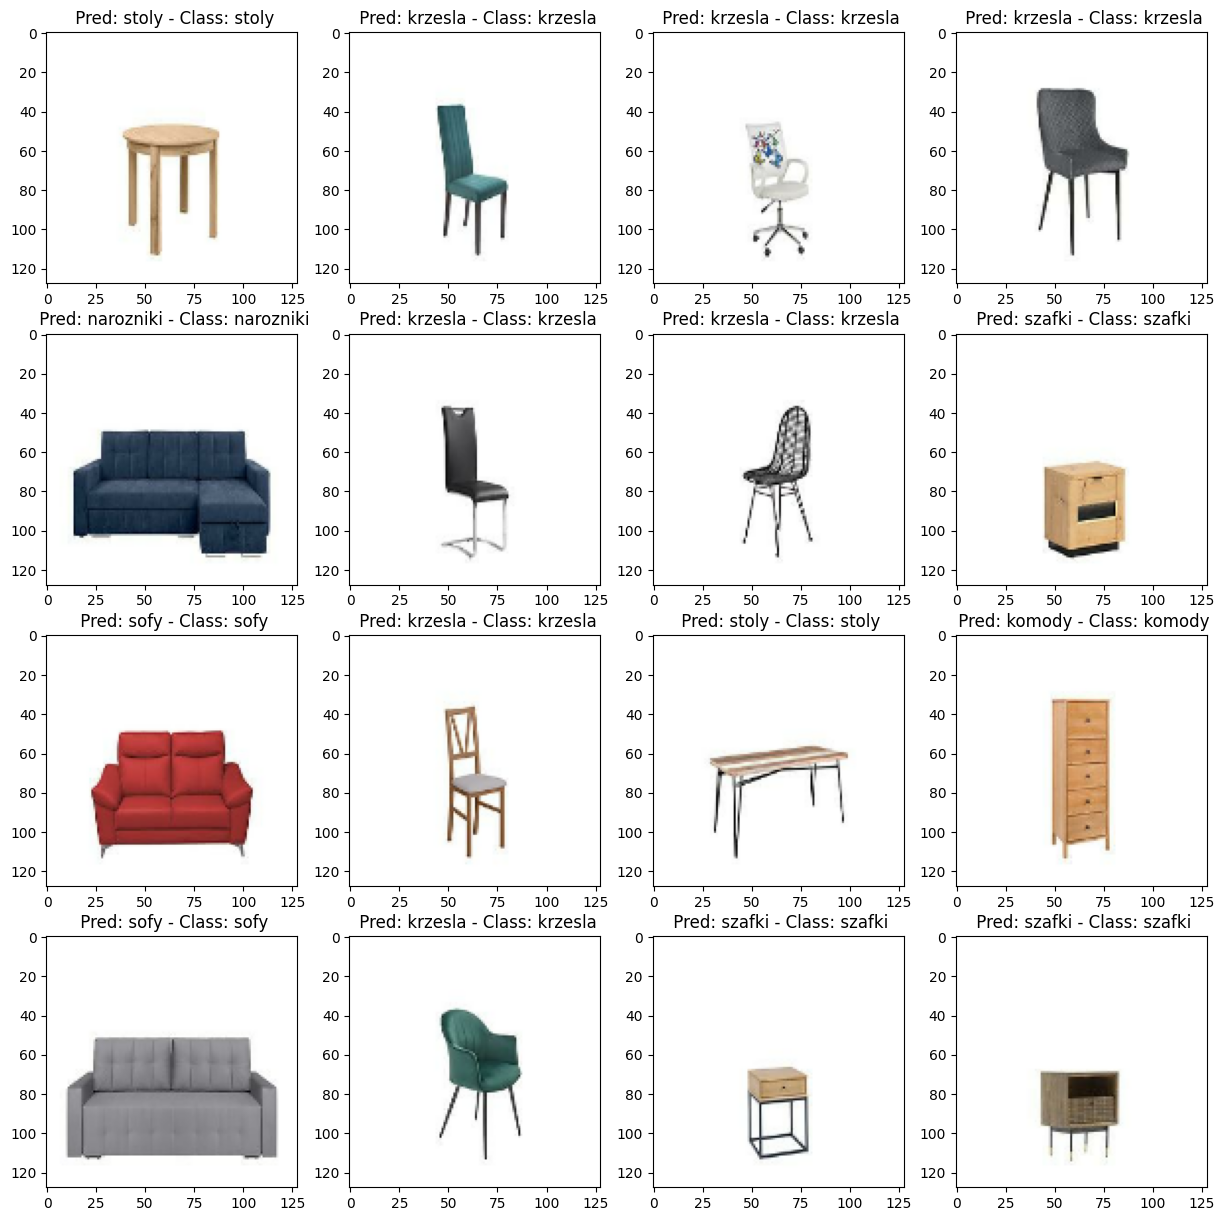

In [ ]:
match_total = 0
number_of_pred_lebel = 0
plt.figure(figsize=(15, 15))

for images, labels in test_ds:
  predictions = model_18.predict(images)
  for i in range(16):
      ax = plt.subplot(4, 4, i + 1)
      plt.imshow(images[i].numpy().astype('uint8'))

      plt.title(f' Pred: {class_names[np.argmax(predictions[i])]} - Class: {class_names[labels[i].numpy().tolist().index(1)]}')
      if class_names[np.argmax(predictions[i])] == class_names[labels[i].numpy().tolist().index(1)]:
        match_total += 1
      number_of_pred_lebel += 1
print()
print('='* 50)
print(f'Number of predicted labels: {number_of_pred_lebel}')
print(f'total_match: {match_total}')
print(f'Prediction accuracy: {match_total/number_of_pred_lebel * 100}%')
print('='* 50)
print()

In [ ]:
#SPRAWDZIĆ PONIŻSZĄ FUNKCJĘ, CZY ZADZIAŁA I BĘDZIE MOŻNA JĄ PODMIENIĆ Z POWYŻSZYM

In [ ]:
def visualize_predictions(model, test_ds, class_names):
  match_total = 0
  number_of_pred_label = 0
  plt.figure(figsize=(15, 15))

  for images, labels in test_ds:
      predictions = model.predict(images)
      for i in range(16):
          ax = plt.subplot(4, 4, i + 1)
          plt.imshow(images[i].numpy().astype('uint8'))

          pred_class_idx = np.argmax(predictions[i])
          true_class_idx = np.argmax(labels[i].numpy())

          plt.title(f' Pred: {class_names[pred_class_idx]} - Class: {class_names[true_class_idx]}')

          if class_names[pred_class_idx] == class_names[true_class_idx]:
              match_total += 1
          number_of_pred_label += 1

  plt.tight_layout()
  plt.show()

  print('=' * 50)
  print(f'Number of predicted labels: {number_of_pred_label}')
  print(f'total_match: {match_total}')
  print(f'Prediction accuracy: {match_total/number_of_pred_label * 100:.2f}%')
  print('=' * 50)

In [ ]:
visualize_predictions(model_18, test_ds, class_names)

The model predicts correctly 94,44% of the time. Out of 144 images from the test set, it correctly assigned a class to 136 pieces of furniture in the images.

# Conclusions (wnioski koncowe)

Wnioski do wykresów i wyników, które wyszły

Wnioski: Co można tutaj jeszcze zrobić i poprawić

- zdobyć więcej danych treningowych
- Data augumentation
- sprawdzić inne współczynniki learing rate dla regularyzacji
- spróbowac inny współczynnik drop out
- zastosować batch normalization

#Brudnopis podczas pisania kodu

In [ ]:
# wnioski

In [ ]:
#napsiać cos o przzewidywanuch powyzej

Wyniki poprawi dodanie wiekszej ilosci danych moze z innej strony ???
dodac data agumenation - opis co to jest

https://machinelearningmastery.com/learning-curves-for-diagnosing-machine-learning-model-performance/

W naszym przypadku, gdy dostępne są ograniczone zbiory danych i dane są słabo zróżnicowane, osiągnięcie wyższej dokładności może być trudne. W takim przypadku, 90% może być uznane za dobry wynik.



Podsumowując, dokładność 90% na zbiorze testowym dla sieci CNN w przypadku problemu wielu klas może być uznane za dobry wynik, ale ostateczna ocena zależy od wielu czynników, w tym kontekstu problemu, dostępności danych, wymagań dziedziny i porównania z innymi modelami. Warto również zwrócić uwagę na macierz pomyłek i analizę wyników dla poszczególnych klas, aby lepiej zrozumieć, jak dobrze model sobie radzi z różnymi klasami.

In [ ]:
a = 'In prevoius models Train and Validation Learning Curves Showing a Training Dataset That May Be too Small Relative to the Validation Dataset.'
a.lower()

'in prevoius models train and validation learning curves showing a training dataset that may be too small relative to the validation dataset.'

In prevoius models train and validation learning curves showing a training dataset that may be too small relative to the validation dataset.

The model scores very well for armchairs, chairs, corners, tables and
cupboards. The model confuses chests of drawers with wardrobes. This is mainly due to the similarity of these objects. The boundary between these objects is so small that a person would have a problem correctly classifying a cupboard or a chest of drawers.

##Prevent overfitting
Steps to prevent overfitting of a neural network

    Get more training data.
    Reduce the complexity of the network.
    Add weight regularization.
    Add dropout.
    Data augmentation.

# dodać
1. dropout
2. reg l2
3. zmieniac filtr
4. ilosc warstw
5. batch wiecej """ czat powiedział że 16, 32, i 64 można przestowac"
6. liczba epok - im wiecej moze podciągnac wyniki do góry



Musimy przeciwdziałać overfittingowi:
- regularyzacja L2
- dropout
- batch normalization
- warstwy - konwolucja
- wielkość filtra zmienić, np. z 3x3 na 5x5
- augumentacja regulować -> zwiększenie wariancji danych

Prevent overfitting
Steps to prevent overfitting of a neural network

    Get more training data.
    Reduce the complexity of the network.
    Add weight regularization.
    Add dropout.
    Data augmentation.

Zrobić:
- callback

callback = keras.callbacks.EarlyStopping(monitor='loss', patience=3)

history_4 = model_4.fit(train_ds,
                    validation_data= val_ds,
                    epochs = 100,
                    batch_size= 32,
                    callbacks=[callback])

- object_detection do krzeseł i stołów
- transfer_learning

keras early stopping



opis koncowy

ocena modelu

Dziękuję za dodatkowe informacje. Na podstawie wyników, które podałeś, model osiągnął bardzo wysoką dokładność na zbiorze treningowym (0.9978) i solidną dokładność na zbiorze walidacyjnym (0.8889).

Dodatkowo, jeśli dokładność na niezależnym zbiorze testowym wyniosła 0.8849, to wskazuje na to, że model dobrze generalizuje na nowe, nieznane dane spoza zbioru treningowego i walidacyjnego.

Biorąc pod uwagę te wyniki, można powiedzieć, że model jest dobrze dopasowany i nie jest ani przetrenowany (overfitting), ani niedotrenowany (underfitting). Ma wysoką dokładność na zbiorze treningowym, dobrą dokładność na zbiorze walidacyjnym i solidną dokładność na zbiorze testowym.

Oczywiście, wartości dokładności i straty same w sobie nie dostarczają pełnego obrazu. Warto również rozważyć inne czynniki, takie jak rozmiar zbioru danych, złożoność modelu, a także domenowe i specyficzne wymagania związane z konkretnym zadaniem.

Pamiętaj, że ocena modelu zawsze jest zależna od kontekstu i wymaga uwzględnienia różnych czynników.

model w powyższym projekcie -> model w nowej wersji projektu
- 1 -> 1
- 2 -> 2
- 3 -> 3
- 14 -> 4
- 4 -> 5
- 12 -> 6
- 5 -> 7
- 17 -> 8
- 18 -> 9

# osąd modeli

modele do zostawienia

*  1 , 2, 3, 4, 12, 6, 17, 18


modele do wywalenia


*   7, 8, 10, 11, 13 , 16


modele do rozwazenia



*   9 , 14, 15







